<a href="https://colab.research.google.com/github/M4tzG/DS_project/blob/main/Project_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Report - Data Science
## Bachelor's Degree in Computer Science / PUCPR

**Prof. Jean Paul Barddal** / **Prof. Rayson Laroca**

`Matheus Gabriel Pereira Nogueira` - `nogueira.gabriel@pucpr.edu.br`

`2025`

# Import the libs you need

In [ ]:
# -----
import pandas as pd
import numpy as np

# -----
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Rectangle

# -----
from scipy.stats import skew, kurtosis
from scipy import stats

# -----
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# -----
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----
from sklearn.decomposition import PCA

# -----
import warnings
warnings.filterwarnings('ignore')


# Load your data

Below, load the data using pandas and perform all necessary data cleansing to ensure that the data types are correct for further analysis.

In [ ]:
# load your data here
df_inic = pd.read_csv('world_bank_development_indicators.csv')
df_inic

country        date  agricultural_land%  forest_land%  land_area  \
0      Afghanistan  1960-01-01                 NaN           NaN        NaN   
1      Afghanistan  1961-01-01           57.878356           NaN   652230.0   
2      Afghanistan  1962-01-01           57.955016           NaN   652230.0   
3      Afghanistan  1963-01-01           58.031676           NaN   652230.0   
4      Afghanistan  1964-01-01           58.116002           NaN   652230.0   
...            ...         ...                 ...           ...        ...   
17267     Zimbabwe  2019-01-01           41.876696     45.213002   386850.0   
17268     Zimbabwe  2020-01-01           41.876696     45.093912   386850.0   
17269     Zimbabwe  2021-01-01           41.876696     44.974822   386850.0   
17270     Zimbabwe  2022-01-01                 NaN           NaN        NaN   
17271     Zimbabwe  2023-01-01                 NaN           NaN        NaN   

       avg_precipitation  trade_in_services%  control_of_corruption_estimate  \
0                    NaN                 NaN                             NaN   
1                  327.0                 NaN                             NaN   
2                  327.0                 NaN                             NaN   
3                  327.0                 NaN                             NaN   
4                  327.0                 NaN                             NaN   
...                  ...                 ...                             ...   
17267              657.0            6.927164                       -1.271190   
17268              657.0            5.118949                       -1.287992   
17269                NaN                 NaN                       -1.253550   
17270                NaN                 NaN                       -1.255139   
17271                NaN                 NaN                             NaN   

       control_of_corruption_std  access_to_electricity%  ...  \
0                            NaN                     NaN  ...   
1                            NaN                     NaN  ...   
2                            NaN                     NaN  ...   
3                            NaN                     NaN  ...   
4                            NaN                     NaN  ...   
...                          ...                     ...  ...   
17267                   0.133336               46.682095  ...   
17268                   0.140076               52.747667  ...   
17269                   0.151591               48.979927  ...   
17270                   0.151262                     NaN  ...   
17271                        NaN                     NaN  ...   

       multidimensional_poverty_headcount_ratio%  gini_index  birth_rate  \
0                                            NaN         NaN      50.340   
1                                            NaN         NaN      50.443   
2                                            NaN         NaN      50.570   
3                                            NaN         NaN      50.703   
4                                            NaN         NaN      50.831   
...                                          ...         ...         ...   
17267                                        NaN        50.3      31.518   
17268                                        NaN         NaN      31.009   
17269                                        NaN         NaN      30.537   
17270                                        NaN         NaN         NaN   
17271                                        NaN         NaN         NaN   

       death_rate  life_expectancy_at_birth  population  rural_population  \
0          31.921                    32.535   8622466.0         7898093.0   
1          31.349                    33.068   8790140.0         8026804.0   
2          30.845                    33.547   8969047.0         8163985.0   
3          30.359                    34.016   9157465.0         8308019.0   
4          29.867     

In [ ]:
df_inic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    17272 non-null  object 
 1   date                                       17272 non-null  object 
 2   agricultural_land%                         14714 non-null  float64
 3   forest_land%                               8176 non-null   float64
 4   land_area                                  14930 non-null  float64
 5   avg_precipitation                          10086 non-null  float64
 6   trade_in_services%                         9195 non-null   float64
 7   control_of_corruption_estimate             4783 non-null   float64
 8   control_of_corruption_std                  4783 non-null   float64
 9   access_to_electricity%                     7348 non-null   float64
 10  renewvable_energy_cons

In [ ]:
# clean and treat the data here
# Valores ausentes
missing_percent = df_inic.isnull().mean() * 100

# mais de 70% de missing
missing = missing_percent[missing_percent > 70].sort_values(ascending=False)
print(missing)

doing_business                               98.905743
time_to_get_operation_license                97.852015
multidimensional_poverty_headcount_ratio%    97.365679
human_capital_index                          96.520380
statistical_performance_indicators           92.838119
logistic_performance_index                   91.853868
central_goverment_debt%                      87.957388
gini_index                                   87.795276
risk_premium_on_lending                      86.278370
research_and_development_expenditure%        83.273506
intentional_homicides                        75.631079
real_interest_rate                           74.432608
goverment_effectiveness_std                  72.446735
goverment_effectiveness_estimate             72.446735
regulatory_quality_estimate                  72.435155
regulatory_quality_std                       72.435155
expense%                                     72.388837
control_of_corruption_estimate               72.307781
control_of

In [ ]:
# clean and treat the data here
threshold = 0.70
df = df_inic.loc[:, df_inic.isnull().mean() < threshold]
print(f"Colunas: {df.shape[1]}")

Colunas: 23


# Statistical Description

In this section, you should report the key characteristics of the dataset, including but not limited to:
* Number of instances;
* Number of features;
* Number of classes;
* Class distribution.

In [ ]:
# instancias e features
print(f"""Instâncias: {df.shape[0]}
Features: {df.shape[1]}""")

Instâncias: 17272
Features: 23


In [ ]:
# classes combinando países e anos (?)
print(f"Numero de classes: {df['country'].nunique()*df['date'].nunique()}")

Numero de classes: 17536


In [ ]:
print(f"""Intervalo de datas:
 {df['date'].min()}  ->   {df['date'].max()}""")

Intervalo de datas:
 1960-01-01  ->   2023-01-01


In [ ]:
# descricao das features numéricas
df.describe().T.style.format("{:.2f}")

In [ ]:
# informacoes gerais sobre o DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               17272 non-null  object 
 1   date                                  17272 non-null  object 
 2   agricultural_land%                    14714 non-null  float64
 3   forest_land%                          8176 non-null   float64
 4   land_area                             14930 non-null  float64
 5   avg_precipitation                     10086 non-null  float64
 6   trade_in_services%                    9195 non-null   float64
 7   access_to_electricity%                7348 non-null   float64
 8   renewvable_energy_consumption%        8076 non-null   float64
 9   electric_power_consumption            7790 non-null   float64
 10  CO2_emisions                          7408 non-null   float64
 11  other_greenhous

In [ ]:
descr = """
agricultural_land%                      - Porcentagem da área total de terra usada para agricultura
forest_land%                            - Porcentagem da área total coberta por florestas
land_area                               - Área total do país/região em quilômetros quadrados
avg_precipitation                       - Média anual de precipitação (chuva, neve etc.) em milímetros
trade_in_services%                      - Porcentagem do PIB gerada pelo comércio de serviços
access_to_electricity%                  - Porcentagem da população com acesso à eletricidade
renewable_energy_consumption%           - Porcentagem do consumo energético total de fontes renováveis
electric_power_consumption              - Consumo médio de energia elétrica per capita em kWh
CO2_emissions                           - Emissões totais de dióxido de carbono (em toneladas métricas)
other_greenhouse_emissions              - Emissões de outros gases de efeito estufa além do CO₂
population_density                      - Número de habitantes por quilômetro quadrado
individuals_using_internet%             - Porcentagem da população que utiliza internet
military_expenditure%                   - Porcentagem do PIB gasta em despesas militares
GDP_current_US                          - Produto Interno Bruto em dólares americanos correntes
government_expenditure_on_education%    - Porcentagem do PIB investida em educação
birth_rate                              - Número de nascimentos por 1.000 habitantes por ano
death_rate                              - Número de mortes por 1.000 habitantes por ano
life_expectancy_at_birth                - Expectativa média de vida ao nascer, em anos
population                              - Número total de habitantes no país/região
rural_population                        - Número ou porcentagem de pessoas vivendo em áreas rurais
"""

# Univariate data analysis

In this section, you should perform univariate data analysis on at least **20 variables**.

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (Gaussian, binomial, exponential, etc.);
2. Skewness;
3. Kurtosis;
4. Mean, standard deviation, and what they stand for in the context of the dataset.

Ensure that each variable is **plotted correctly** based on its type. For instance, make sure scatterplots are not used for categorical data and so forth.

In [ ]:
# colunas utilizadas para analise / descricoa delas no 'df.info()'
coloums = [
    "agricultural_land%",
    "forest_land%",
    "land_area",
    "avg_precipitation",
    "trade_in_services%",
    "access_to_electricity%",
    "renewvable_energy_consumption%",
    "electric_power_consumption",
    "CO2_emisions",
    "other_greenhouse_emisions",
    "population_density",
    "individuals_using_internet%",
    "military_expenditure%",
    "GDP_current_US",
    "government_expenditure_on_education%",
    "birth_rate",
    "death_rate",
    "life_expectancy_at_birth",
    "population",
    "rural_population"
]

In [ ]:
def univariate_data_analysis(data, column_name, log_scale=False):

    # -------------------------------------
    # analises estatisticas
    series = data.dropna()
    if series.empty:
        print(f"A série para '{column_name}' está vazia ou contém apenas NaNs.")
        return

    print(f"|--- Análise Univariada para: {column_name} ---|")

    mean_val = np.mean(series)
    median_val = np.median(series)
    std_val = np.std(series)
    skew_val = skew(series)
    kurt_val = kurtosis(series) # Fisher's kurtosis (normal é 0)
    Q1 = np.percentile(series, 25)
    Q3 = np.percentile(series, 75)
    IQR = Q3 - Q1

    # -------------------------------------
    # interpretacoes
    skew_interp = "simétrica" if abs(skew_val) < 0.5 else "assimetria à direita" if skew_val > 0 else "assimetria à esquerda"
    kurt_interp = "mesocúrtica (normal)" if abs(kurt_val) < 0.5 else "leptocúrtica (pico alto)" if kurt_val > 0 else "platicúrtica (achatada)"

    print(f"""
    Estatísticas Descritivas:
    - Média: {mean_val:,.2f}
    - Mediana: {median_val:,.2f}
    - Desvio Padrão: {std_val:,.2f}
    - IQR (Intervalo Interquartil): {IQR:,.2f}
    - Skewness (Assimetria): {skew_val:.2f} ({skew_interp})
    - Kurtosis (Curtose): {kurt_val:.2f} ({kurt_interp})
    """)

    # -------------------------------------
    # visualizacao
    plot_data = series.copy()
    plot_title = f'Distribuição de {column_name}'
    plot_xlabel = column_name

    if log_scale:
        # sem logs em numeros negativos
        if (plot_data < 0).any():
            print("\nAVISO: Não é possível aplicar escala de log pois existem valores negativos. Plotando com escala linear.")
        else:
            plot_data = np.log1p(plot_data)
            plot_title = f'Distribuição de {column_name} (Escala Log)'
            plot_xlabel = f'{column_name} (log)'

    plt.figure(figsize=(14, 5))

    # -------------------------------------
    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(plot_data, kde=True, bins=30, color='skyblue')
    plt.title(plot_title)
    plt.xlabel(plot_xlabel)
    plt.ylabel('Frequência')

    # -------------------------------------
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=plot_data, color='lightcoral')
    plt.title(f'Boxplot de {column_name}')
    plt.xlabel(plot_xlabel)

    plt.tight_layout()
    plt.show()

In [ ]:
df['country']

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
17267       Zimbabwe
17268       Zimbabwe
17269       Zimbabwe
17270       Zimbabwe
17271       Zimbabwe
Name: country, Length: 17272, dtype: object

In [ ]:
df.columns

Index(['country', 'date', 'agricultural_land%', 'forest_land%', 'land_area',
       'avg_precipitation', 'trade_in_services%', 'access_to_electricity%',
       'renewvable_energy_consumption%', 'electric_power_consumption',
       'CO2_emisions', 'other_greenhouse_emisions', 'population_density',
       'inflation_annual%', 'individuals_using_internet%',
       'military_expenditure%', 'GDP_current_US',
       'government_expenditure_on_education%', 'birth_rate', 'death_rate',
       'life_expectancy_at_birth', 'population', 'rural_population'],
      dtype='object')

|--- Análise Univariada para: GDP_current_US ---|

    Estatísticas Descritivas:
    - Média: 1,223,793,839,853.19
    - Mediana: 17,857,439,651.09
    - Desvio Padrão: 5,453,286,875,487.38
    - IQR (Intervalo Interquartil): 224,012,738,297.76
    - Skewness (Assimetria): 8.12 (assimetria à direita)
    - Kurtosis (Curtose): 84.91 (leptocúrtica (pico alto))
    


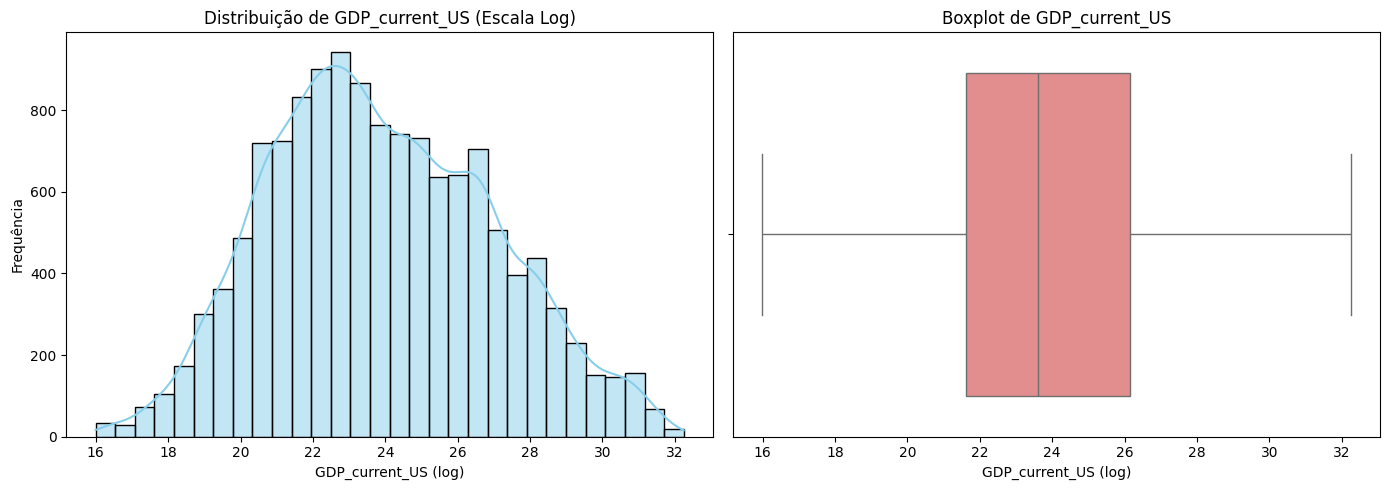

In [ ]:
univariate_data_analysis(df['GDP_current_US'], 'GDP_current_US', log_scale=True) # Passa a coluna como Series


# A variável apresenta forte assimetria à direita e alta curtose,
# indicando concentração de PIBs baixos com poucos países extremamente ricos.
# Isso evidencia grande desigualdade econômica global.

|--- Análise Univariada para: life_expectancy_at_birth ---|

    Estatísticas Descritivas:
    - Média: 64.25
    - Mediana: 66.78
    - Desvio Padrão: 11.11
    - IQR (Intervalo Interquartil): 15.76
    - Skewness (Assimetria): -0.64 (assimetria à esquerda)
    - Kurtosis (Curtose): -0.20 (mesocúrtica (normal))
    


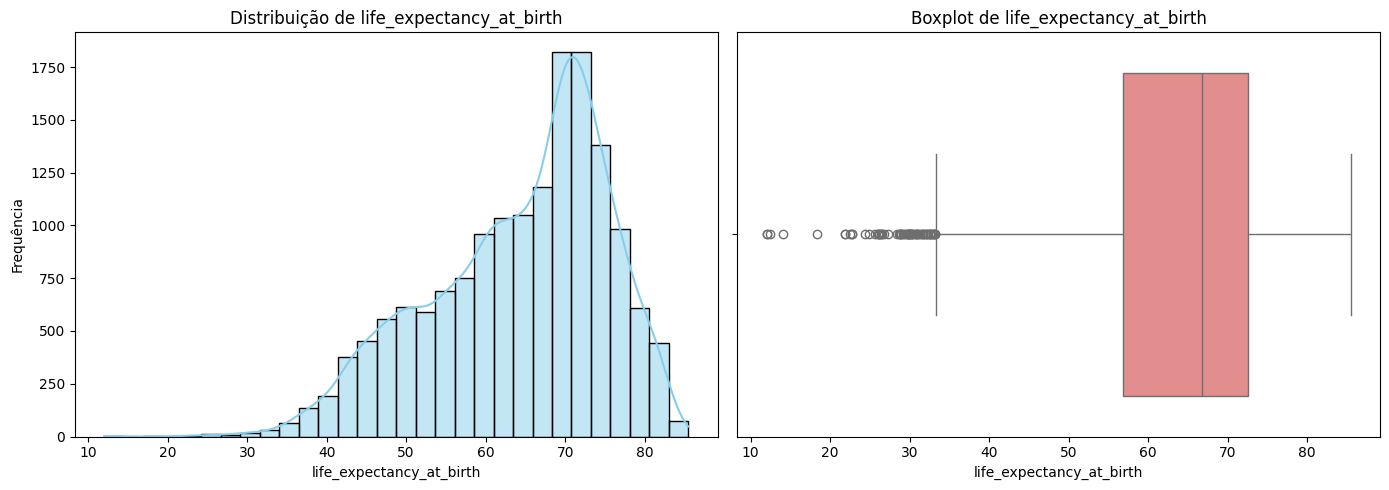

In [ ]:
#  Anos de vida esperados ao nascer (anos).
univariate_data_analysis(df['life_expectancy_at_birth'], 'life_expectancy_at_birth')

# A distribuição é levemente assimétrica à esquerda, com média abaixo da mediana, indicando maior concentração de países com alta expectativa de vida.
# A curtose próxima de zero sugere uma forma aproximadamente normal.

|--- Análise Univariada para: renewvable_energy_consumption% ---|

    Estatísticas Descritivas:
    - Média: 31.03
    - Mediana: 20.99
    - Desvio Padrão: 29.86
    - IQR (Intervalo Interquartil): 48.84
    - Skewness (Assimetria): 0.74 (assimetria à direita)
    - Kurtosis (Curtose): -0.80 (platicúrtica (achatada))
    


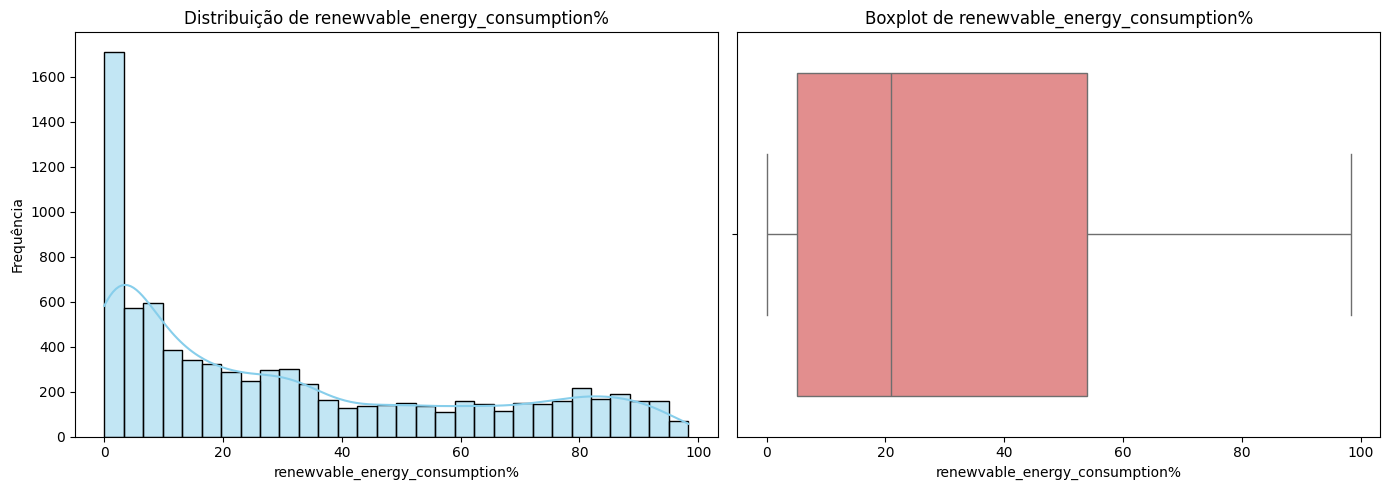

In [ ]:
# Porcentagem (%) do consumo total de energia final.

univariate_data_analysis(df['renewvable_energy_consumption%'], 'renewvable_energy_consumption%')

# A variável apresenta assimetria à direita, com muitos países consumindo pouca energia renovável e poucos com altos percentuais.
# A curtose negativa indica uma distribuição mais achatada e dispersa que a normal.

|--- Análise Univariada para: individuals_using_internet% ---|

    Estatísticas Descritivas:
    - Média: 24.50
    - Mediana: 8.38
    - Desvio Padrão: 29.82
    - IQR (Intervalo Interquartil): 44.62
    - Skewness (Assimetria): 1.00 (assimetria à direita)
    - Kurtosis (Curtose): -0.40 (mesocúrtica (normal))
    


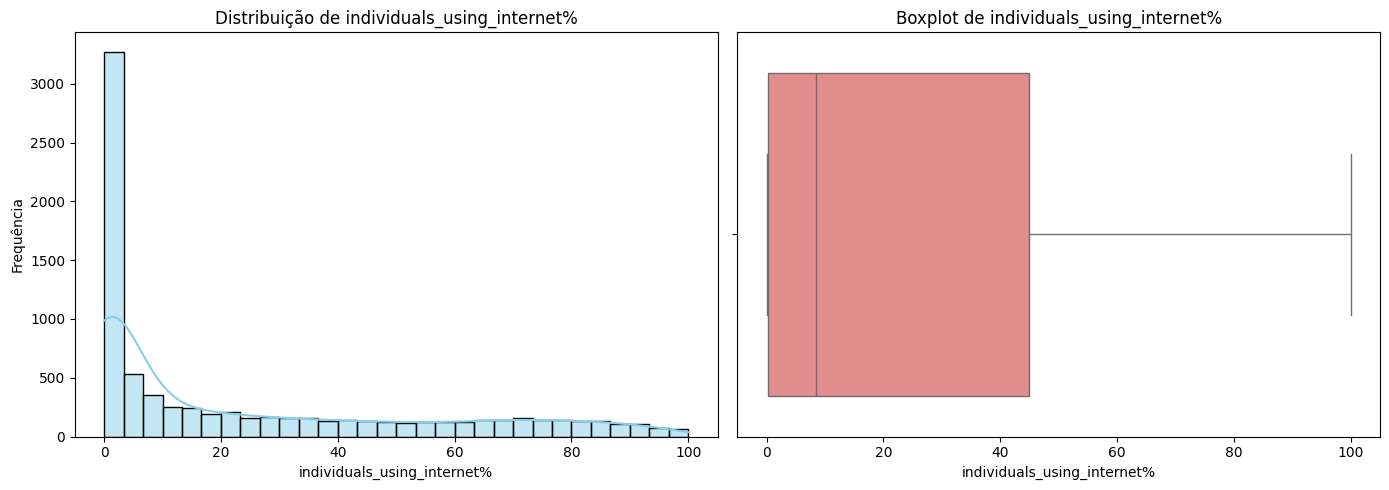

In [ ]:
#  Porcentagem (%) da população que usa a internet.

univariate_data_analysis(df['individuals_using_internet%'], 'individuals_using_internet%')


# A variável apresenta assimetria à direita, com muitos países com baixo acesso à internet e poucos com altos percentuais.
# A curtose levemente negativa indica uma distribuição mais dispersa e menos concentrada que a normal.

|--- Análise Univariada para: government_expenditure_on_education% ---|

    Estatísticas Descritivas:
    - Média: 4.30
    - Mediana: 4.14
    - Desvio Padrão: 1.81
    - IQR (Intervalo Interquartil): 2.06
    - Skewness (Assimetria): 3.01 (assimetria à direita)
    - Kurtosis (Curtose): 43.98 (leptocúrtica (pico alto))
    


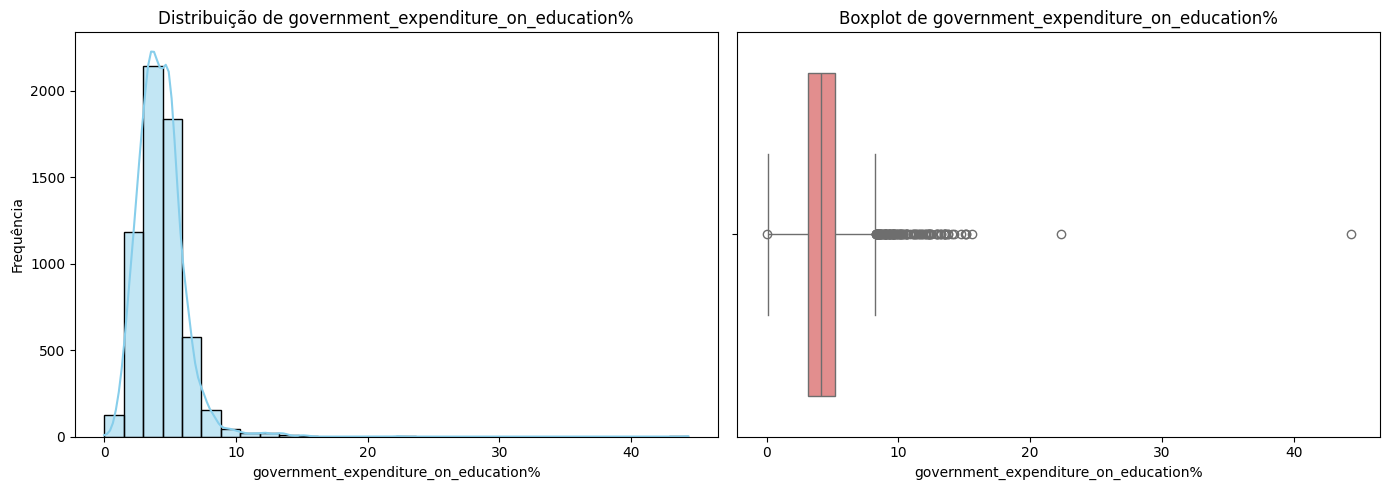

In [ ]:
# Gastos ocm educaçao % PIB

univariate_data_analysis(df['government_expenditure_on_education%'], 'government_expenditure_on_education%')


# A variável apresenta forte assimetria à direita e curtose elevada, indicando que a maioria dos países
# investe percentuais modestos em educação, com poucos outliers com investimentos significativamente maiores.

|--- Análise Univariada para: agricultural_land% ---|

    Estatísticas Descritivas:
    - Média: 36.95
    - Mediana: 37.47
    - Desvio Padrão: 20.55
    - IQR (Intervalo Interquartil): 30.28
    - Skewness (Assimetria): 0.15 (simétrica)
    - Kurtosis (Curtose): -0.67 (platicúrtica (achatada))
    


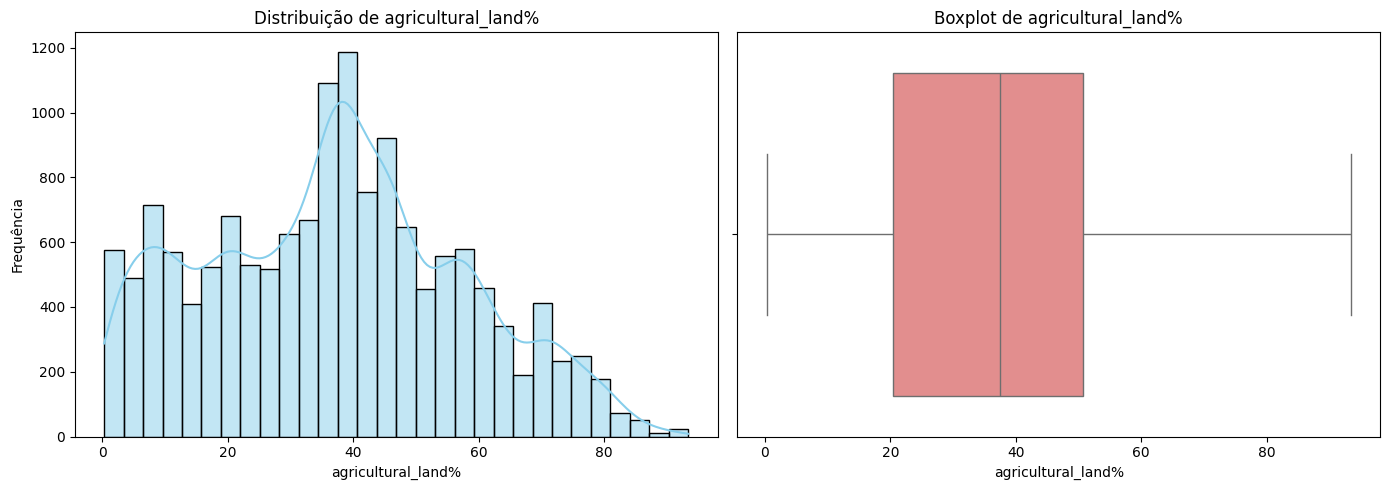

In [ ]:
# Porcentagem (%) da área terrestre do país/região.

univariate_data_analysis(df['agricultural_land%'], 'agricultural_land%')

# A variável apresenta distribuição aproximadamente simétrica, com média próxima da mediana,
# e curtose negativa, indicando uma forma mais achatada e dispersa que a normal.

|--- Análise Univariada para: forest_land% ---|

    Estatísticas Descritivas:
    - Média: 32.41
    - Mediana: 30.77
    - Desvio Padrão: 23.35
    - IQR (Intervalo Interquartil): 34.69
    - Skewness (Assimetria): 0.58 (assimetria à direita)
    - Kurtosis (Curtose): -0.20 (mesocúrtica (normal))
    


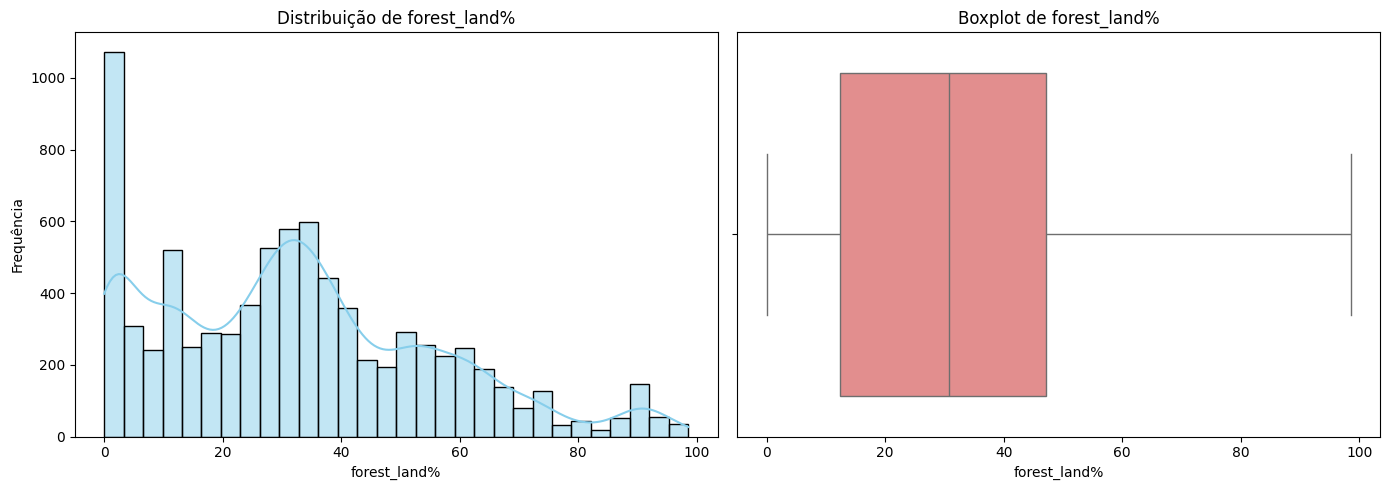

In [ ]:
# Porcentagem (%) da área terrestre do país/região.
univariate_data_analysis(df['forest_land%'], 'forest_land%')

# A variável apresenta leve assimetria à direita, com média ligeiramente acima da mediana, indicando que a maioria dos países possui cobertura florestal moderada.
# A curtose próxima de zero sugere uma distribuição relativamente normal.

|--- Análise Univariada para: land_area ---|

    Estatísticas Descritivas:
    - Média: 5,078,663.95
    - Mediana: 241,930.00
    - Desvio Padrão: 14,061,200.70
    - IQR (Intervalo Interquartil): 1,422,650.00
    - Skewness (Assimetria): 4.77 (assimetria à direita)
    - Kurtosis (Curtose): 28.22 (leptocúrtica (pico alto))
    


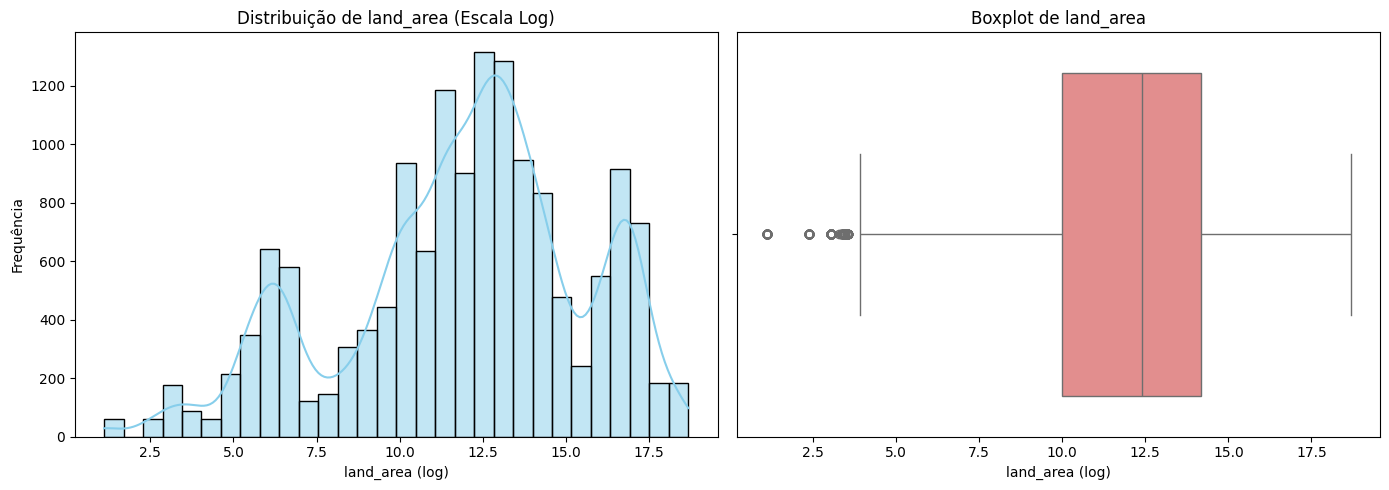

In [ ]:
# Área terrestre em quilômetros quadrados (km²).

univariate_data_analysis(df['land_area'], 'land_area', log_scale=True)


# A variável apresenta forte assimetria à direita, com poucos países muito extensos puxando a média para cima.
# A alta curtose indica concentração de valores baixos e presença de grandes outliers.

|--- Análise Univariada para: avg_precipitation ---|

    Estatísticas Descritivas:
    - Média: 1,214.02
    - Mediana: 1,110.00
    - Desvio Padrão: 810.53
    - IQR (Intervalo Interquartil): 1,191.00
    - Skewness (Assimetria): 0.53 (assimetria à direita)
    - Kurtosis (Curtose): -0.59 (platicúrtica (achatada))
    


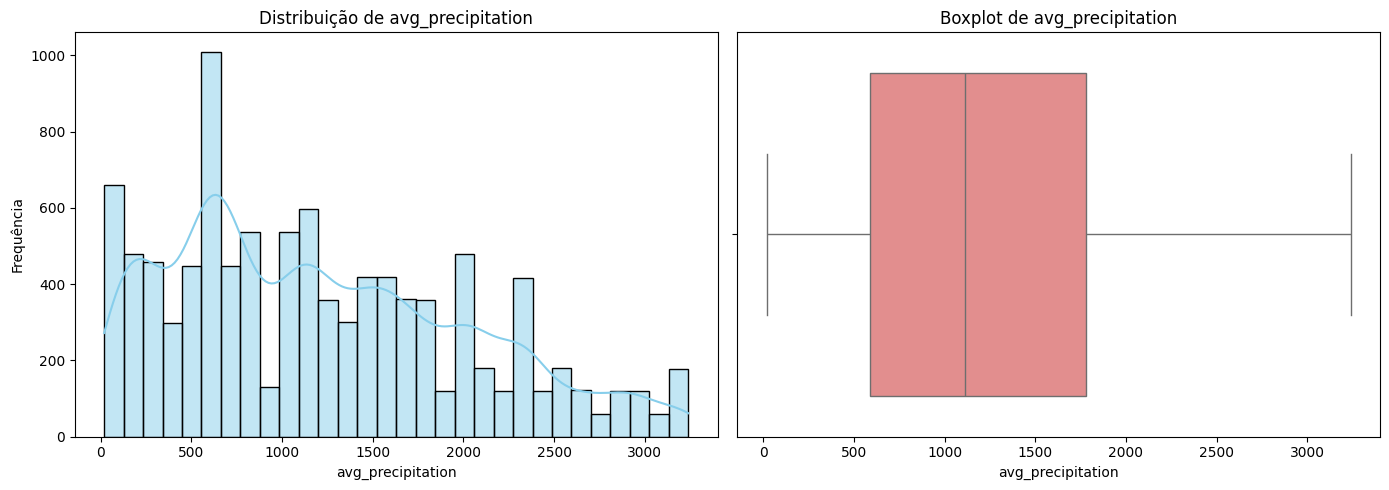

In [ ]:
# Precipitação média em milímetros por ano (mm/ano).

univariate_data_analysis(df['avg_precipitation'], 'avg_precipitation')

# Apresenta distribuição moderadamente assimétrica à direita,
# com valores razoavelmente concentrados ao redor da mediana e poucos países com precipitação média muito elevada.

|--- Análise Univariada para: trade_in_services% ---|

    Estatísticas Descritivas:
    - Média: 21.00
    - Mediana: 13.46
    - Desvio Padrão: 23.26
    - IQR (Intervalo Interquartil): 16.03
    - Skewness (Assimetria): 4.51 (assimetria à direita)
    - Kurtosis (Curtose): 33.15 (leptocúrtica (pico alto))
    


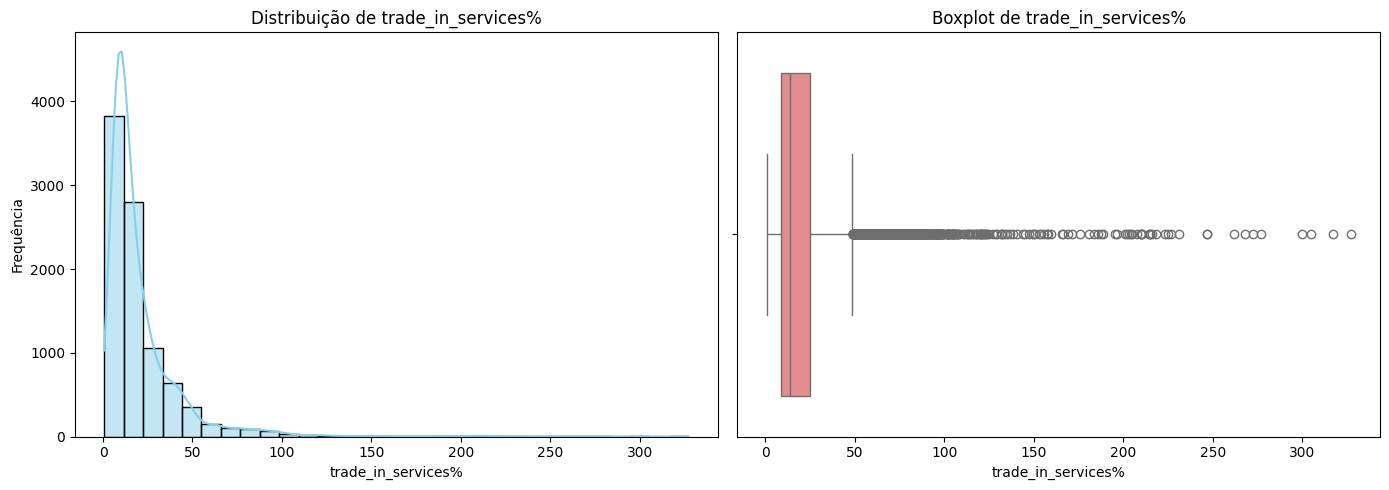

In [ ]:
# Porcentagem (%) do PIB.
univariate_data_analysis(df['trade_in_services%'], 'trade_in_services%')

# A variável apresenta forte assimetria à direita, com poucos países altamente envolvidos em comércio de serviços.
# A alta curtose indica concentração de valores baixos com outliers extremos, revelando grande disparidade entre os países.

|--- Análise Univariada para: access_to_electricity% ---|

    Estatísticas Descritivas:
    - Média: 80.76
    - Mediana: 98.29
    - Desvio Padrão: 28.74
    - IQR (Intervalo Interquartil): 31.56
    - Skewness (Assimetria): -1.35 (assimetria à esquerda)
    - Kurtosis (Curtose): 0.42 (mesocúrtica (normal))
    


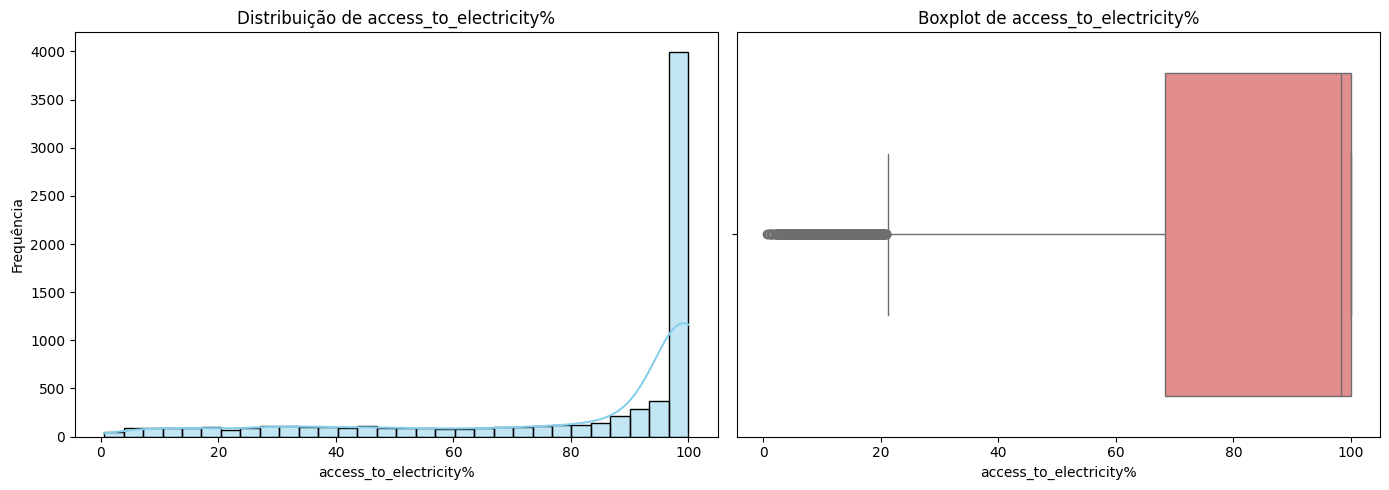

In [ ]:
# Porcentagem (%) da população com acesso à eletricidade.
univariate_data_analysis(df['access_to_electricity%'], 'access_to_electricity%')


# A variável apresenta assimetria à esquerda, indicando que a maioria dos países possui alto acesso à eletricidade, com alguns poucos apresentando valores muito baixos.
# A curtose próxima de zero sugere uma distribuição próxima da normal.

|--- Análise Univariada para: electric_power_consumption ---|

    Estatísticas Descritivas:
    - Média: 2,885.20
    - Mediana: 1,331.11
    - Desvio Padrão: 4,102.85
    - IQR (Intervalo Interquartil): 3,517.24
    - Skewness (Assimetria): 3.65 (assimetria à direita)
    - Kurtosis (Curtose): 24.96 (leptocúrtica (pico alto))
    


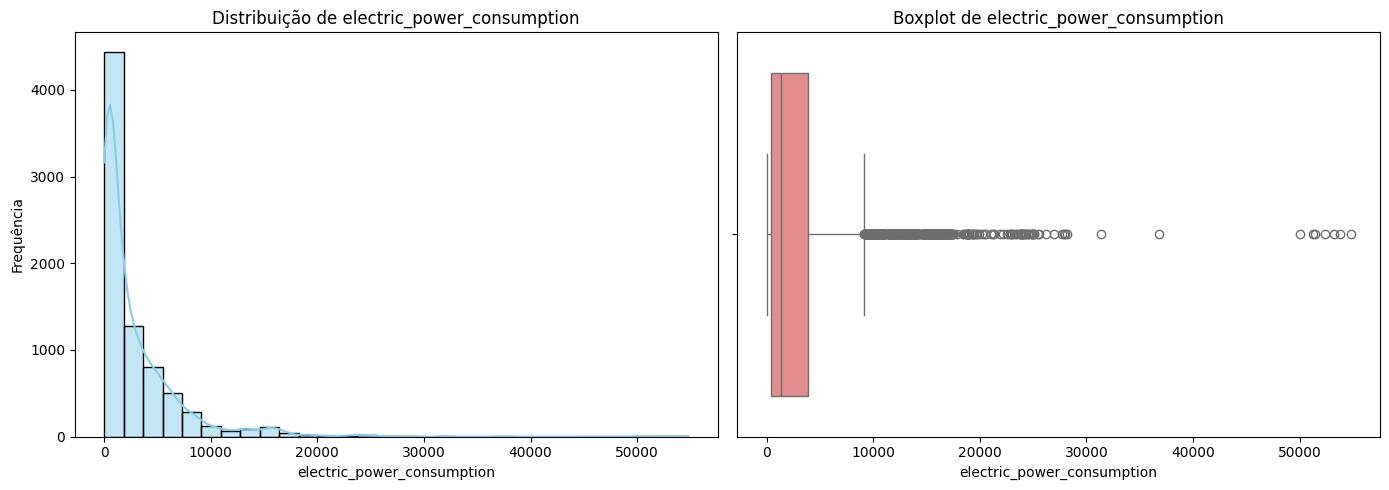

In [ ]:
# Quilowatt-hora per capita (kWh por pessoa).
univariate_data_analysis(df['electric_power_consumption'], 'electric_power_consumption')

# A variável apresenta forte assimetria à direita, indicando que poucos países consomem muita energia elétrica, enquanto a maioria consome valores menores.
# A alta curtose reflete uma concentração de valores baixos e presença de outliers extremos.

|--- Análise Univariada para: CO2_emisions ---|

    Estatísticas Descritivas:
    - Média: 1,023,985.81
    - Mediana: 23,834.75
    - Desvio Padrão: 3,343,521.65
    - IQR (Intervalo Interquartil): 247,744.18
    - Skewness (Assimetria): 5.00 (assimetria à direita)
    - Kurtosis (Curtose): 30.49 (leptocúrtica (pico alto))
    


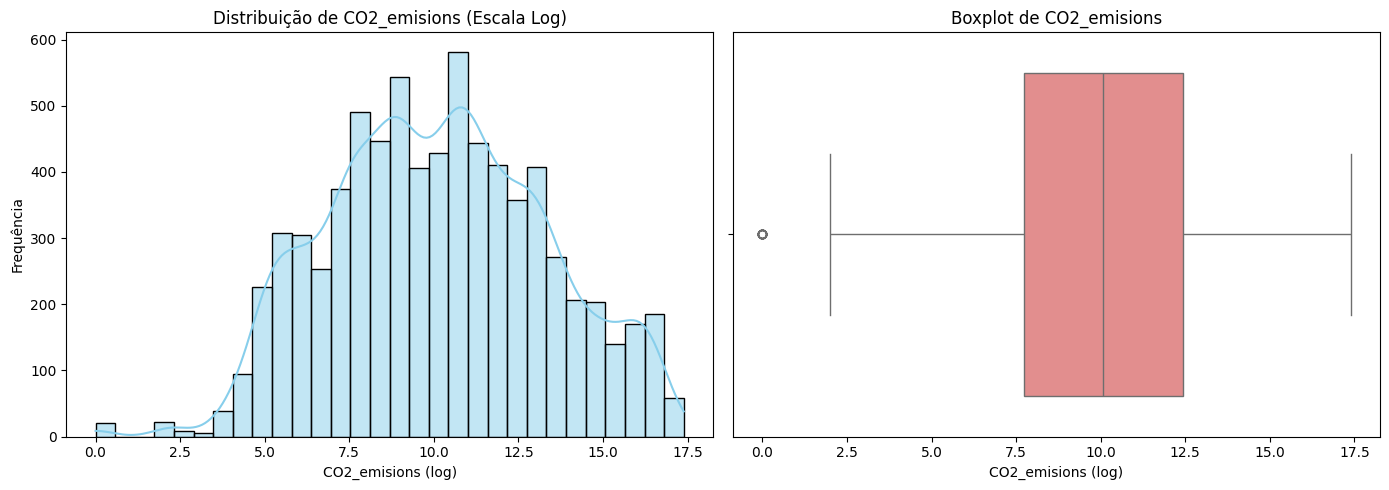

In [ ]:
# Quilotoneladas de CO₂ em quilotoneladas (kt).

univariate_data_analysis(df['CO2_emisions'], 'CO2_emisions', log_scale=True)


# A variável apresenta forte assimetria à direita e alta curtose, indicando que poucos países emitem quantidades muito grandes de CO2,
# enquanto a maioria possui emissões bem menores, evidenciando grande disparidade nas emissões globais.

|--- Análise Univariada para: other_greenhouse_emisions ---|

    Estatísticas Descritivas:
    - Média: 1,479,214.81
    - Mediana: 50,372.71
    - Desvio Padrão: 4,595,673.47
    - IQR (Intervalo Interquartil): 457,288.42
    - Skewness (Assimetria): 4.99 (assimetria à direita)
    - Kurtosis (Curtose): 30.40 (leptocúrtica (pico alto))
    


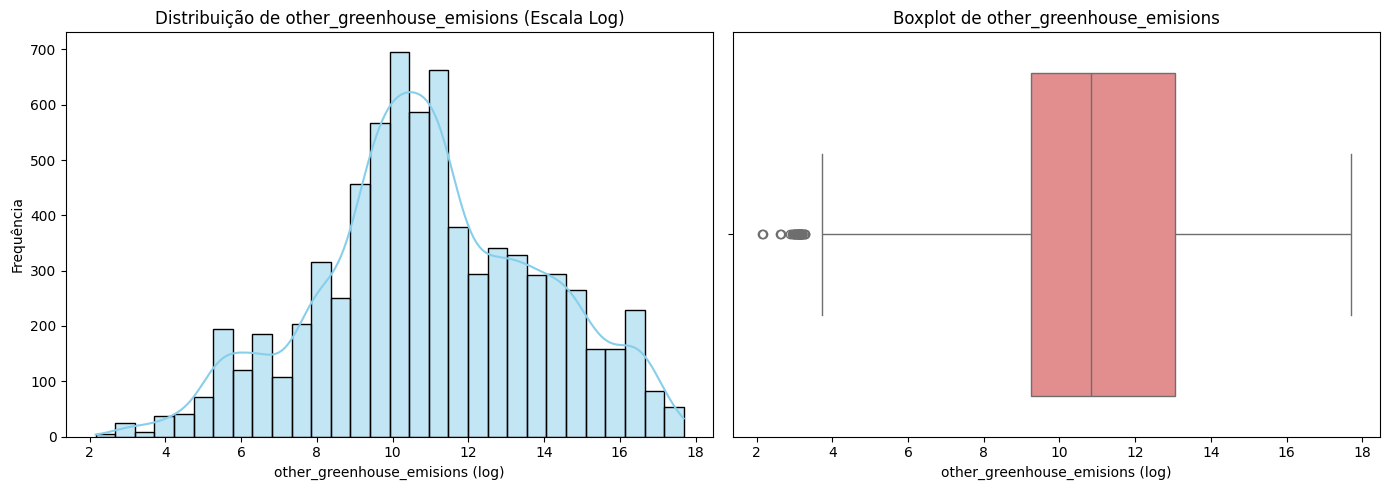

In [ ]:
# Quilotoneladas equivalentes de CO₂ (kt CO₂eq).
univariate_data_analysis(df['other_greenhouse_emisions'], 'other_greenhouse_emisions', log_scale=True)


# A variável apresenta forte assimetria à direita e alta curtose, indicando que poucos países têm emissões muito elevadas de gases de efeito estufa,
# enquanto a maioria possui valores baixos, evidenciando grande desigualdade nas emissões.

|--- Análise Univariada para: population_density ---|

    Estatísticas Descritivas:
    - Média: 293.64
    - Mediana: 53.80
    - Desvio Padrão: 1,497.79
    - IQR (Intervalo Interquartil): 115.83
    - Skewness (Assimetria): 9.77 (assimetria à direita)
    - Kurtosis (Curtose): 103.94 (leptocúrtica (pico alto))
    


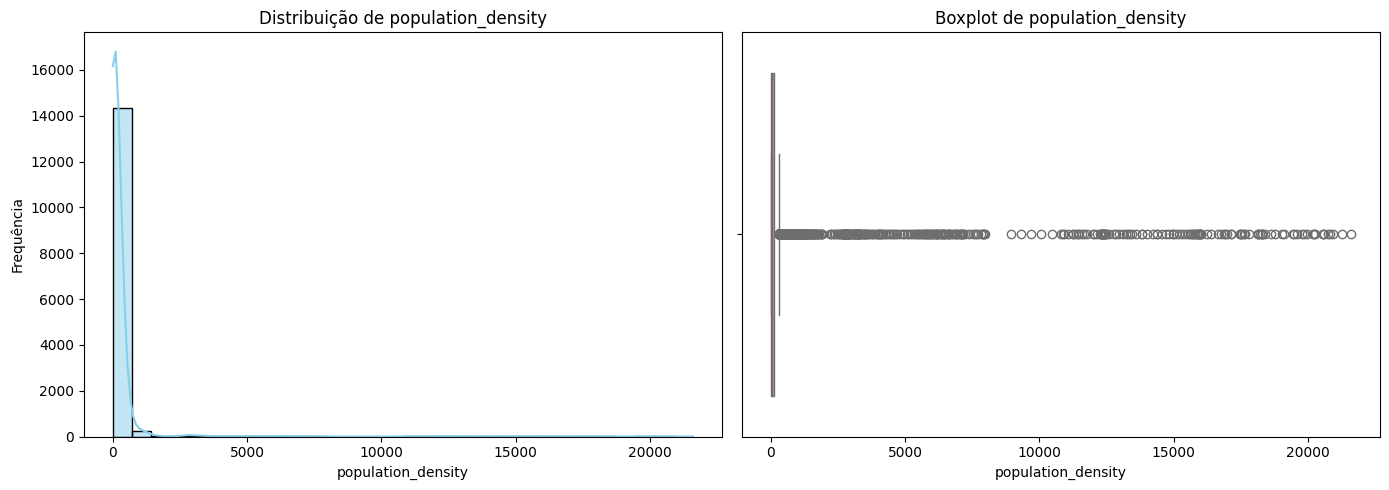

In [ ]:
# Habitantes por quilômetro quadrado (pessoas/km²).
univariate_data_analysis(df['population_density'], 'population_density')

# A variável apresenta forte assimetria à direita e curtose muito alta, indicando que a maioria dos países tem baixa densidade populacional,
# enquanto poucos apresentam densidades extremamente elevadas, gerando grande disparidade.

|--- Análise Univariada para: military_expenditure% ---|

    Estatísticas Descritivas:
    - Média: 2.78
    - Mediana: 2.05
    - Desvio Padrão: 2.89
    - IQR (Intervalo Interquartil): 2.00
    - Skewness (Assimetria): 9.58 (assimetria à direita)
    - Kurtosis (Curtose): 268.68 (leptocúrtica (pico alto))
    


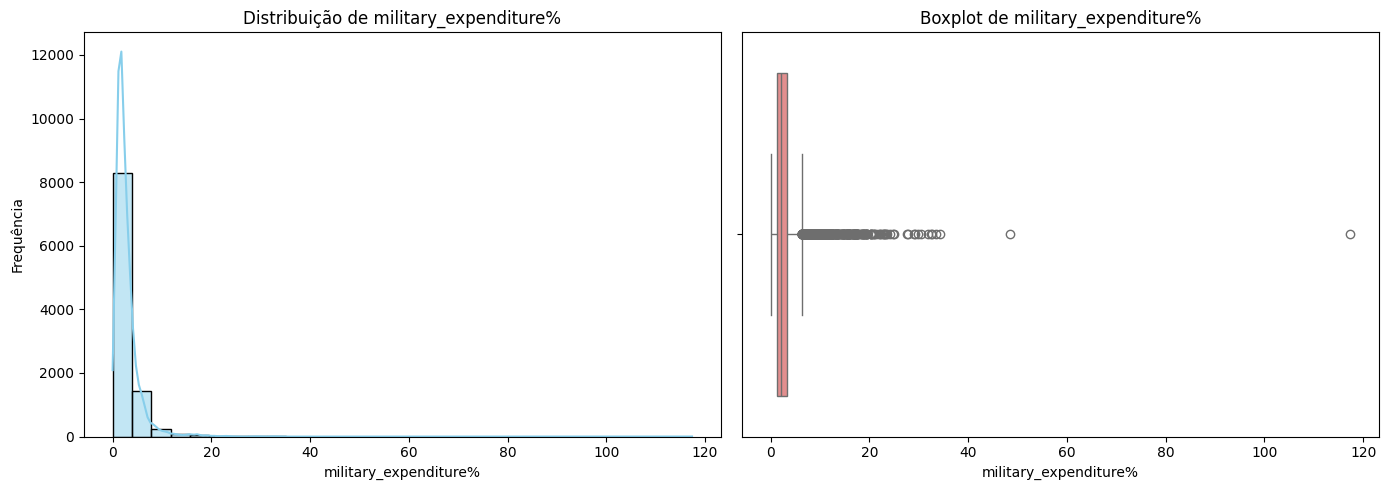

In [ ]:
# Despesas militares como % do PIB
univariate_data_analysis(df['military_expenditure%'], 'military_expenditure%')

# A variável apresenta forte assimetria à direita e curtose extremamente alta, indicando que a maioria dos países tem gastos militares baixos,
# enquanto poucos apresentam gastos muito elevados, gerando grande disparidade.

|--- Análise Univariada para: birth_rate ---|

    Estatísticas Descritivas:
    - Média: 28.20
    - Mediana: 27.07
    - Desvio Padrão: 12.86
    - IQR (Intervalo Interquartil): 23.31
    - Skewness (Assimetria): 0.18 (simétrica)
    - Kurtosis (Curtose): -1.26 (platicúrtica (achatada))
    


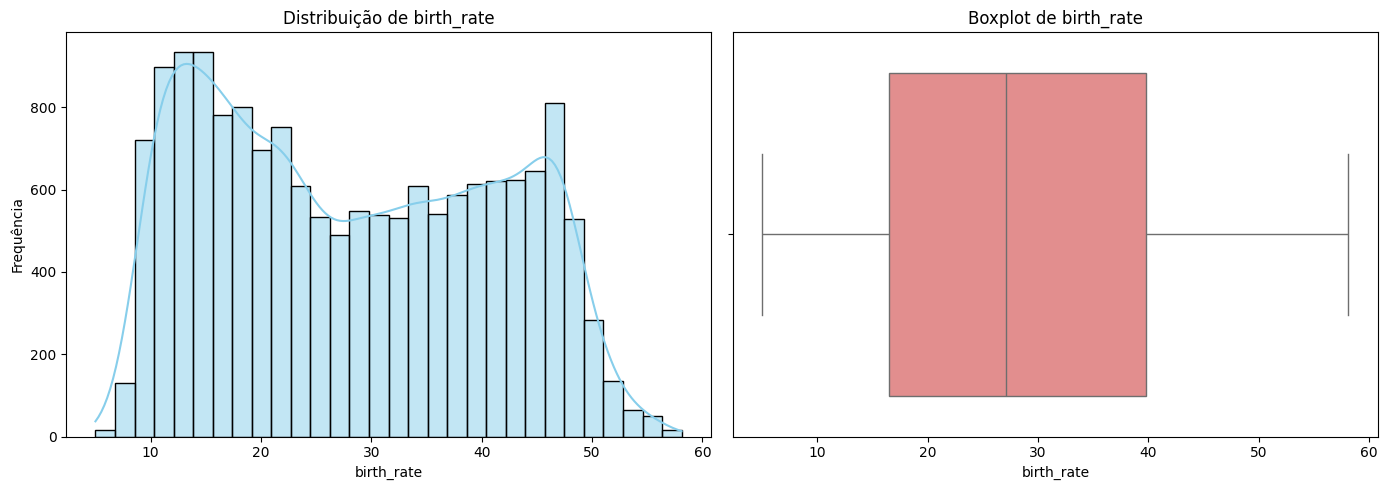

In [ ]:
# Nascimentos por mil pessoas (por 1.000 habitantes).
univariate_data_analysis(df['birth_rate'], 'birth_rate')

# A variável apresenta distribuição próxima da simetria, com média e mediana similares.
# A curtose negativa indica uma distribuição mais achatada, com menor concentração de valores centrais e maior dispersão.

|--- Análise Univariada para: death_rate ---|

    Estatísticas Descritivas:
    - Média: 10.49
    - Mediana: 9.20
    - Desvio Padrão: 5.36
    - IQR (Intervalo Interquartil): 5.47
    - Skewness (Assimetria): 2.18 (assimetria à direita)
    - Kurtosis (Curtose): 14.60 (leptocúrtica (pico alto))
    


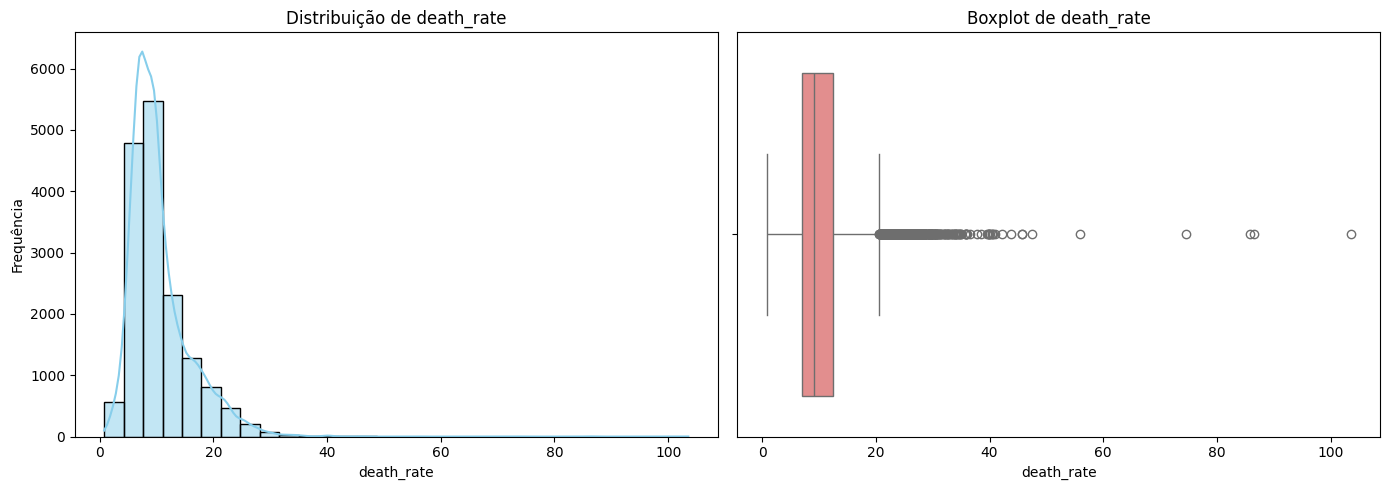

In [ ]:
# Mortes por mil pessoas (por 1.000 habitantes).
univariate_data_analysis(df['death_rate'], 'death_rate')

# A variável apresenta assimetria à direita e alta curtose, indicando que a maioria dos países tem
# taxas de mortalidade próximas, mas há alguns com valores muito elevados, causando grande disparidade.

|--- Análise Univariada para: population ---|

    Estatísticas Descritivas:
    - Média: 215,973,748.51
    - Mediana: 6,787,419.00
    - Desvio Padrão: 710,244,009.69
    - IQR (Intervalo Interquartil): 45,422,031.00
    - Skewness (Assimetria): 5.56 (assimetria à direita)
    - Kurtosis (Curtose): 37.11 (leptocúrtica (pico alto))
    


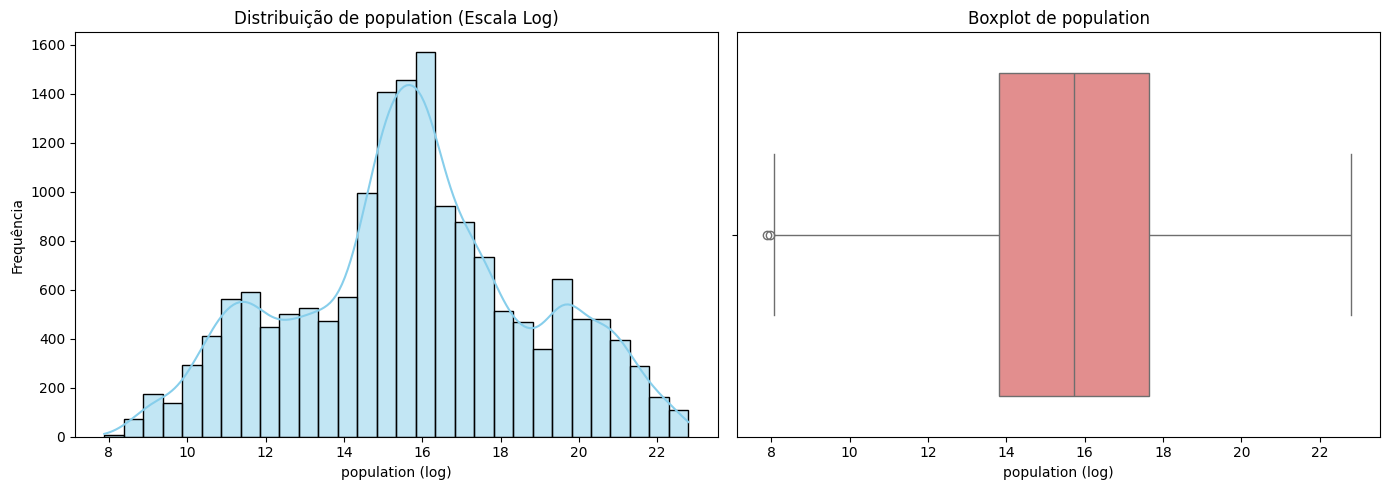

In [ ]:
# Número total de habitantes (unidade absoluta).
univariate_data_analysis(df['population'], 'population', log_scale=True)

# A variável população apresenta forte assimetria à direita, com poucos países muito populosos elevando a média em relação à mediana.
# A alta curtose indica concentração de muitos países com populações menores e alguns outliers extremos.

|--- Análise Univariada para: rural_population ---|

    Estatísticas Descritivas:
    - Média: 123,102,647.97
    - Mediana: 3,148,533.00
    - Desvio Padrão: 408,735,149.80
    - IQR (Intervalo Interquartil): 19,922,391.50
    - Skewness (Assimetria): 5.00 (assimetria à direita)
    - Kurtosis (Curtose): 28.08 (leptocúrtica (pico alto))
    


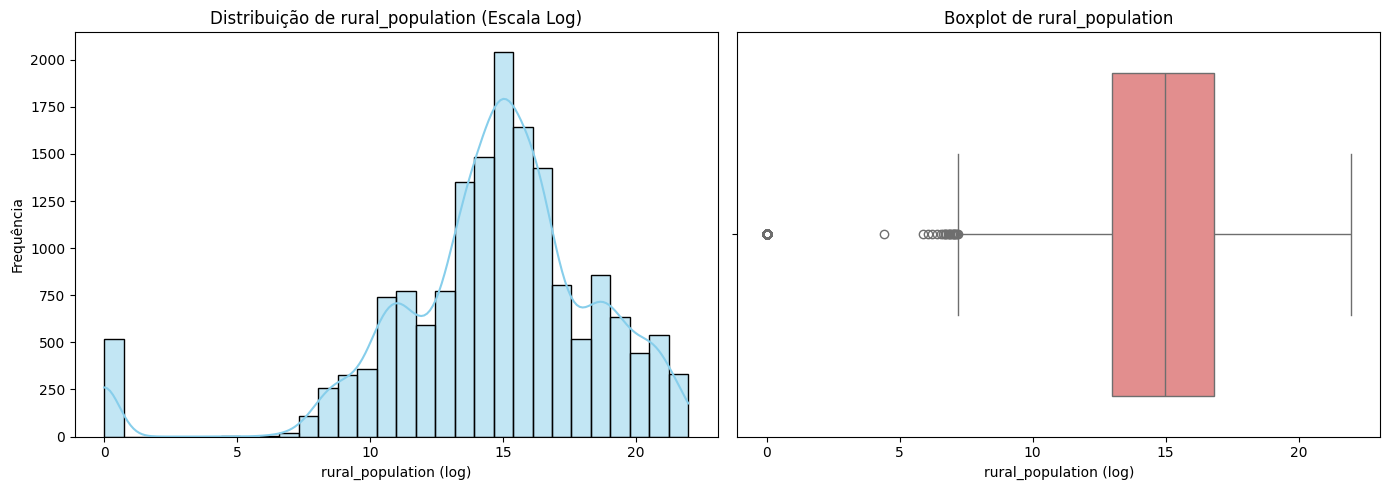

In [ ]:
# Número total de habitantes em áreas rurais (unidade absoluta).
univariate_data_analysis(df['rural_population'], 'rural_population', log_scale=True)

# A variável apresenta forte assimetria à direita e alta curtose, indicando que a maioria dos países possui populações rurais pequenas,
# enquanto poucos países têm populações rurais extremamente grandes, gerando grande disparidade.

# Multivariate data analysis

In this section, you should plot at least **5 multivariate visualizations**. The key here is to investigate underlying correlations and behaviors within the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **ONE** non-obvious behavior in the data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. Explain why you have selected these specific variables and what you expect to discover through their relationship;
2. Determine what kind of visualization is the most suitable;
3. Report the findings and discuss whether they corroborate or not the aforementioned hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For example, consider applying techniques such as PCA, t-SNE, or even others that we haven't covered in the lectures. The goal is to cultivate a critical mindset toward data analysis and our work.

### Important

It is strictly prohibited to create multivariate visualizations using variables that were not included in the previous section (univariate data analysis).

In [ ]:
# --- Configurações de Visualização ---
# sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14


# nova variável para analise
df['GDP_per_capita'] = df['GDP_current_US'].div(df['population']).fillna(0)
df.replace([np.inf, -np.inf], np.nan, inplace=True)


# colonas analise (com a nova)
columns_for_analysis = [
    "agricultural_land%", "forest_land%", "land_area", "avg_precipitation",
    "trade_in_services%", "access_to_electricity%", "renewvable_energy_consumption%",
    "electric_power_consumption", "CO2_emisions", "other_greenhouse_emisions",
    "population_density", "individuals_using_internet%", "military_expenditure%",
    "government_expenditure_on_education%", "birth_rate", "death_rate",
    "life_expectancy_at_birth", "population", "rural_population",
    "GDP_per_capita"
]

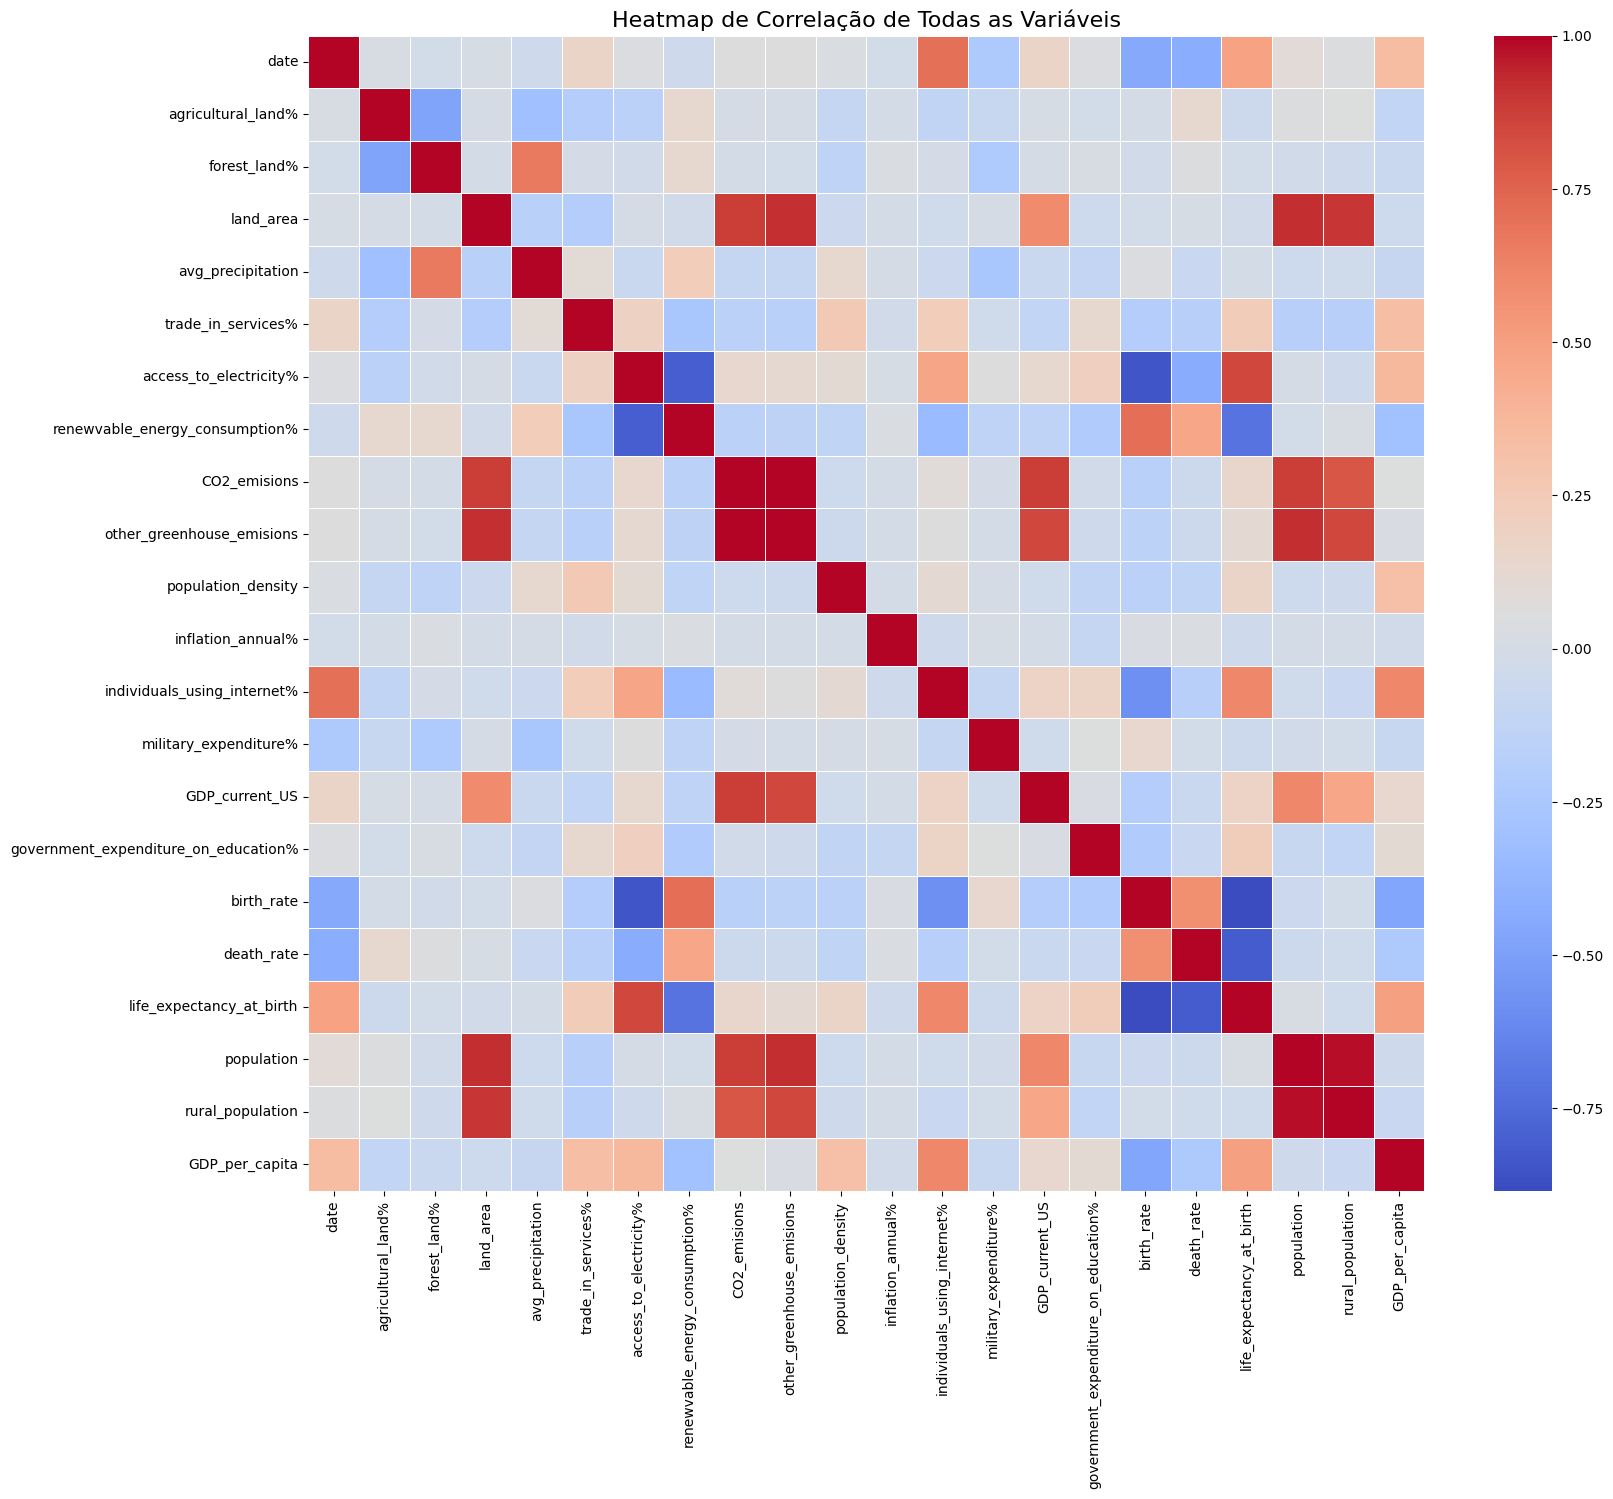

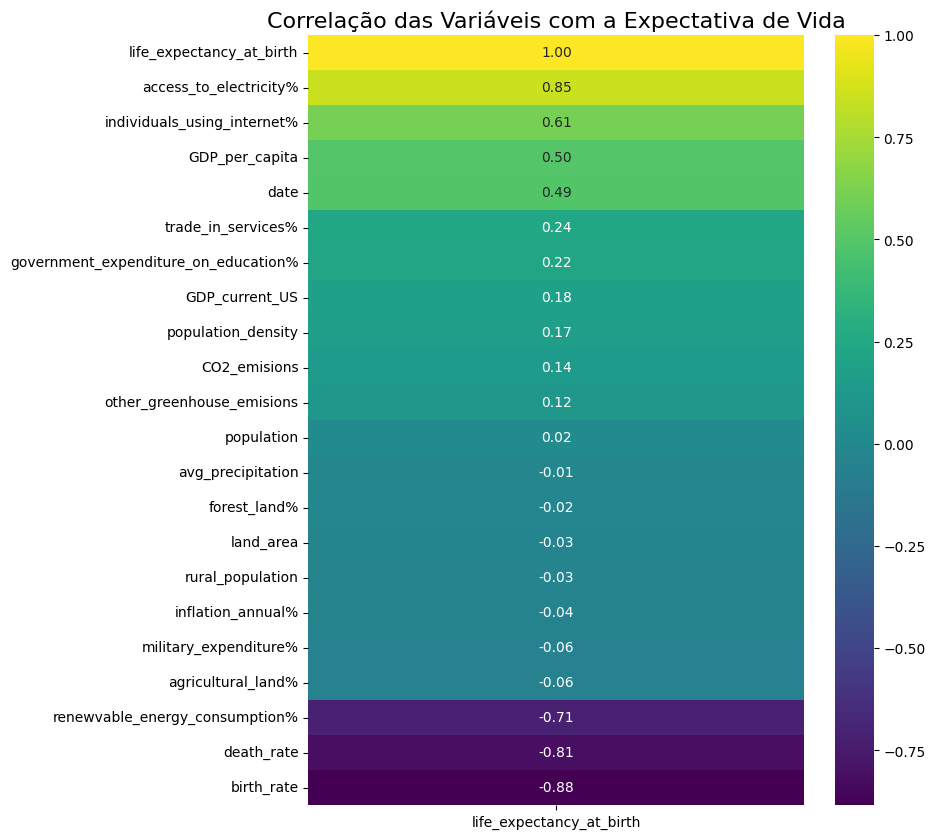

In [ ]:
# heatmap de correlacao entre as variáveis
df['date'] = pd.to_datetime(df['date'])

# Por exemplo, a filtragem por ano que usamos na análise multivariada:
# df_recent = df[df['date'].dt.year == 2018].copy()
df_recent = df.copy()


plt.figure(figsize=(18, 15))

df_recent = df_recent.drop("country", axis=1)
df_recent = df_recent.drop("electric_power_consumption", axis=1)


corr_matrix = df_recent.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap de Correlação de Todas as Variáveis')
plt.show()

# correlacao variável alvo
plt.figure(figsize=(8, 10))
corr_target = corr_matrix[['life_expectancy_at_birth']].sort_values(by='life_expectancy_at_birth', ascending=False)
sns.heatmap(corr_target, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlação das Variáveis com a Expectativa de Vida')
plt.show()

# ===================================================================================================================

# Foi definido um problema de pesquisa: A previsão da Expectativa de Vida ao Nascer (life_expectancy_at_birth) de um país, quais
# indicadores são os mais impactantes?.
# É um indicador de desenvolvimento humano fundamental. O modelo poderia ajudar a entender quais fatores
# (econômicos, sociais, de saúde, etc.) mais impactam a longevidade de uma população.
# Para isso, primeiramente foram analisadas todas as correlações entre as variáveis.

# ===================================================================================================================

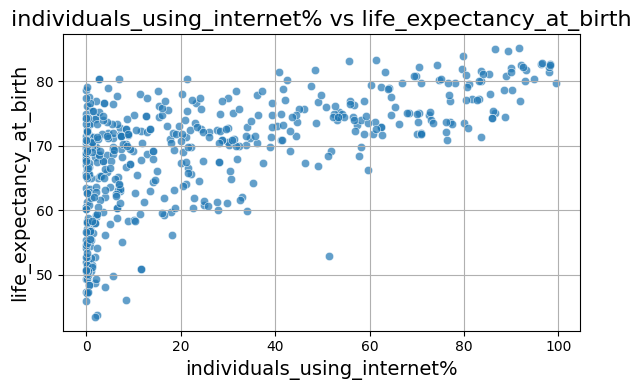

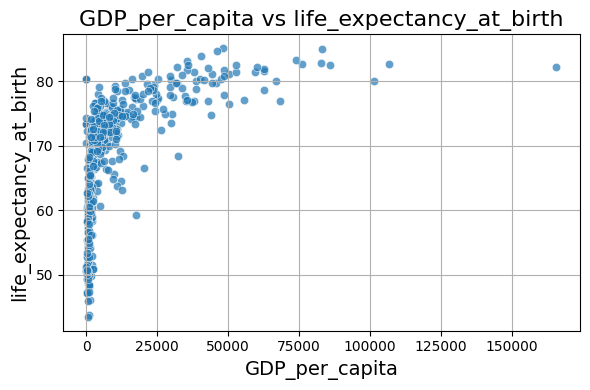

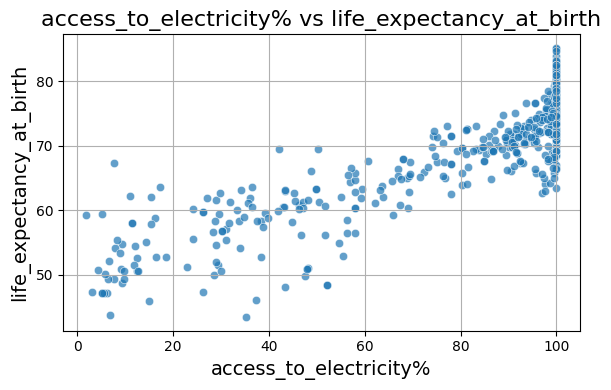

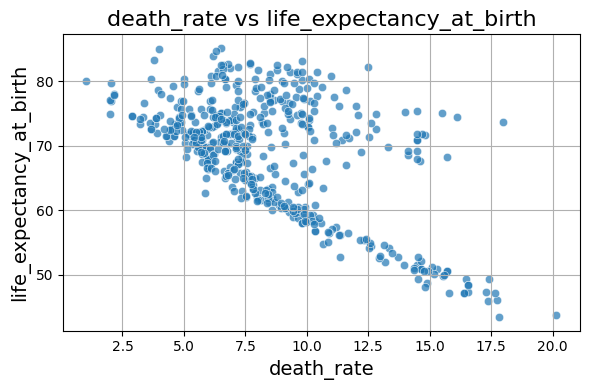

In [ ]:
# alvo + as 4 com maiores correlacoes
most_relevant_cols = [
    'life_expectancy_at_birth',
    'individuals_using_internet%',
    'GDP_per_capita',
    'access_to_electricity%',
    'death_rate' # correlacao negativa forte
]

target = 'life_expectancy_at_birth'

df_plot = df_recent[most_relevant_cols].dropna()

# com uma amostra
df_plot = df_plot.sample(n=500, random_state=42, replace=True)

# cria um grafico para cada
for col in most_relevant_cols:
    if col == target:
        continue  # pula a variável alvo

    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_plot, x=col, y=target, alpha=0.7)
    plt.title(f'{col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# ===================================================================================================================
# Visualize a relação par-a-par e a distribuição de um subconjunto de 4 variáveis mais importantes.
# Qual é a forma da relação entre a Expectativa de Vida e seus preditores mais promissores?
# Pertite vizualizar a natureza da relação (ex: a relação entre PIB e expectativa de vida tende a ser logarítmica,
# não puramente linear).
# ===================================================================================================================

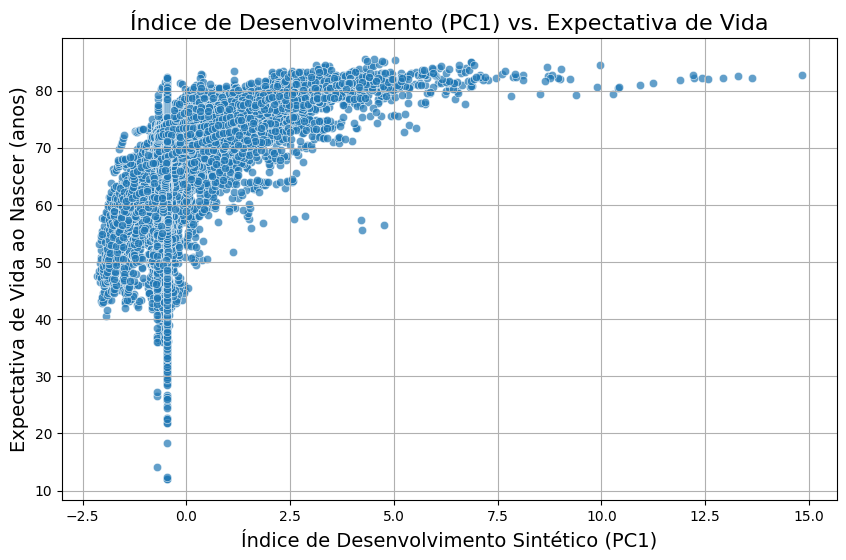

In [ ]:
# features que conceitualmente medem "desenvolvimento"
dev_features = [
    'GDP_per_capita',
    'access_to_electricity%',
    'individuals_using_internet%',
    'trade_in_services%'
]

df_pca = df_recent[['life_expectancy_at_birth'] + dev_features].copy()

# lidar com dados faltantes
imputer = SimpleImputer(strategy='median')
df_pca[dev_features] = imputer.fit_transform(df_pca[dev_features])

# padronizar dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_pca[dev_features])

# PCA
pca = PCA(n_components=1) # primeiro sera o indice
df_pca['development_index_PC1'] = pca.fit_transform(scaled_features)

# 5. Visualizar o resultado
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca,
                x='development_index_PC1',
                y='life_expectancy_at_birth',
                alpha=0.7)
plt.title('Índice de Desenvolvimento (PC1) vs. Expectativa de Vida')
plt.xlabel('Índice de Desenvolvimento Sintético (PC1)')
plt.ylabel('Expectativa de Vida ao Nascer (anos)')
plt.grid(True)
plt.show()

# ===================================================================================================================
# É possível combinar múltiplas variáveis relacionadas ao desenvolvimento (PIB, eletricidade, internet, etc.)
# em um único "Índice de Desenvolvimento" e ver como ele se relaciona com a Expectativa de Vida?
#
# O PCA é uma técnica de redução de dimensionalidade que pode servir como uma boa análise multivariada.
# ===================================================================================================================

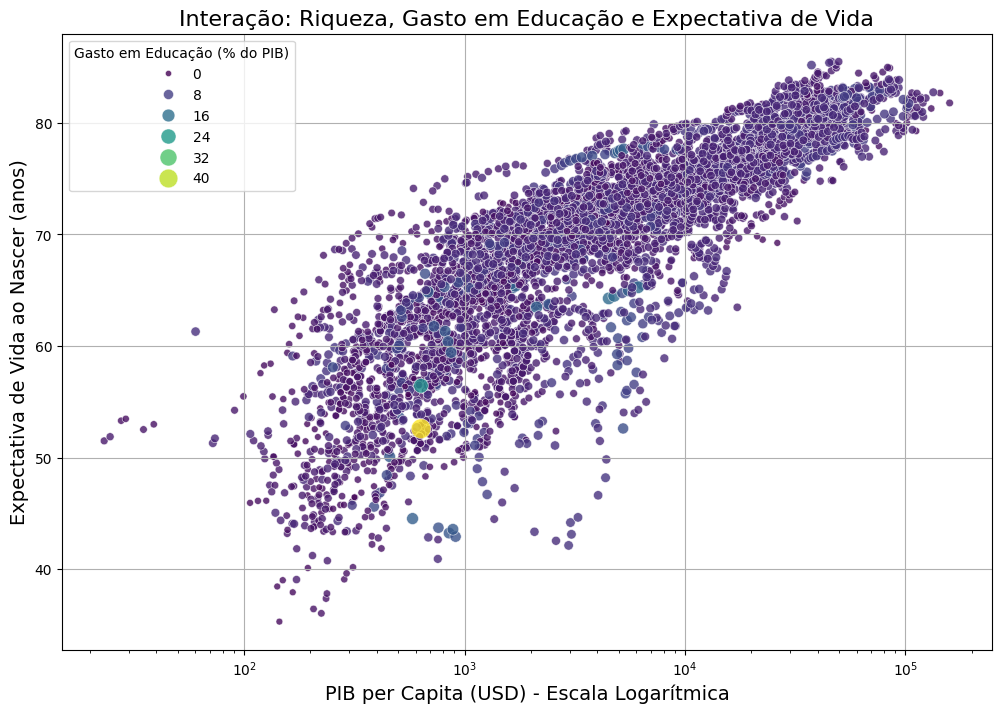

In [ ]:
df_interaction = df_recent[[
    'GDP_per_capita',
    'life_expectancy_at_birth',
    'government_expenditure_on_education%'
]].dropna()

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=df_interaction,
    x='GDP_per_capita',
    y='life_expectancy_at_birth',
    hue='government_expenditure_on_education%',
    size='government_expenditure_on_education%',
    palette='viridis',
    sizes=(20, 200),
    alpha=0.8
)

# O PIB per capita tem uma distribuição muito assimétrica (skewed).
# logaritmica para melhorar visualizacao
scatter_plot.set_xscale('log')
plt.title('Interação: Riqueza, Gasto em Educação e Expectativa de Vida')
plt.xlabel('PIB per Capita (USD) - Escala Logarítmica')
plt.ylabel('Expectativa de Vida ao Nascer (anos)')
plt.legend(title='Gasto em Educação (% do PIB)')
plt.grid(True)
plt.show()

# ===================================================================================================================
# O efeito da riqueza (PIB) na Expectativa de Vida é o mesmo para todos os países,
# ou ele é influenciado por outros fatores, como o investimento em educação?
#
# para um mesmo nível de PIB, países que investem mais em educação podem a ter uma expectativa
# de vida sistematicamente maior do que países que investem menos. Isso mostra que o
# efeito do PIB não é tudo; outras políticas públicas, como o investimento em educação, podem moderar essa relação.
# ===================================================================================================================

# Final Plots (Effective Data Visualization)

In this section, you need to **enhance 3 multivariate visualizations** that were presented in the previous section of the report.
The goal is to enhance these visualizations so that they can be effectively presented to an audience unfamiliar with the dataset or with data analysis.
**Therefore, make sure that their size, colors, textures, and other visual elements are appropriate and convey the intended information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot;
2. Provide a description of the visualization, highlighting the key findings that can be drawn from it.


**Hint**: take a look at the checklist based on Evergreen’s work to ensure your visualizations meet the best practices for clarity and impact.

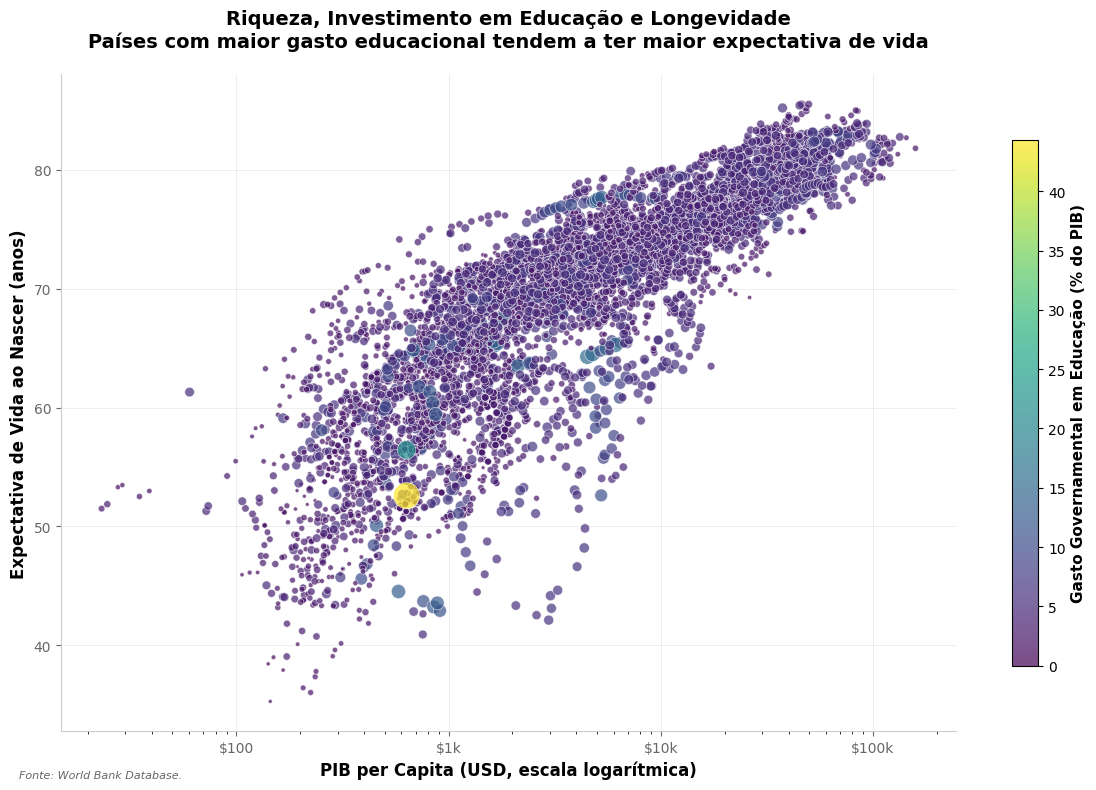


--- Insights Principais ---
Países com alto gasto em educação (>6%): Expectativa de vida média = 70.4 anos
Países com baixo gasto em educação (<4%): Expectativa de vida média = 66.0 anos


In [ ]:

df_interaction = df_recent[[
    'GDP_per_capita',
    'life_expectancy_at_birth',
    'government_expenditure_on_education%'
]].dropna()


plt.style.use('default')
sns.set_palette("viridis")

# ----------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('white')

# Criar categorias de gasto em educação para melhor interpretacao
df_interaction['edu_category'] = pd.cut(
    df_interaction['government_expenditure_on_education%'],
    bins=3,
    labels=['Baixo (< 4%)', 'Médio (4-6%)', 'Alto (> 6%)']
)

# --------------------------------------------

colors = ['#440154', '#31688e', '#35b779']
scatter = ax.scatter(
    df_interaction['GDP_per_capita'],
    df_interaction['life_expectancy_at_birth'],
    c=df_interaction['government_expenditure_on_education%'],
    s=df_interaction['government_expenditure_on_education%'] * 8,  # tamanho proporcional
    alpha=0.7,
    cmap='viridis',
    edgecolors='white',
    linewidth=0.5
)

# --------------------------------------------

# escala logaritmica no eixo X
ax.set_xscale('log')

# formatacao dos eixos
def currency_formatter(x, p):
    if x >= 1000:
        return f'${x/1000:.0f}k'
    else:
        return f'${x:.0f}'

ax.xaxis.set_major_formatter(FuncFormatter(currency_formatter))

# ----------------------------------------------------------------------------------------
# labels
ax.set_xlabel('PIB per Capita (USD, escala logarítmica)', fontsize=12, fontweight='bold')
ax.set_ylabel('Expectativa de Vida ao Nascer (anos)', fontsize=12, fontweight='bold')
ax.set_title('Riqueza, Investimento em Educação e Longevidade\n'
             'Países com maior gasto educacional tendem a ter maior expectativa de vida',
             fontsize=14, fontweight='bold', pad=20)


cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
cbar.set_label('Gasto Governamental em Educação (% do PIB)',
               fontsize=11, fontweight='bold')
cbar.ax.tick_params(labelsize=10)


ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['bottom'].set_color('#CCCCCC')


ax.tick_params(colors='#666666', labelsize=10)

# --------------------------------------------
plt.tight_layout()

fig.text(0.02, 0.02, 'Fonte: World Bank Database.',
         fontsize=8, style='italic', color='#666666')

plt.show()

# --------------------------------------------
# Insights principais
print("\n--- Insights Principais ---")
high_edu = df_interaction[df_interaction['government_expenditure_on_education%'] > 6]
low_edu = df_interaction[df_interaction['government_expenditure_on_education%'] < 4]

if len(high_edu) > 0 and len(low_edu) > 0:
    print(f"Países com alto gasto em educação (>6%): Expectativa de vida média = {high_edu['life_expectancy_at_birth'].mean():.1f} anos")
    print(f"Países com baixo gasto em educação (<4%): Expectativa de vida média = {low_edu['life_expectancy_at_birth'].mean():.1f} anos")

# ===================================================================================================================
# Investir uma porcentagem maior do PIB em educação, tende
# a ter uma expectativa de vida ao nascer mais alta?
# ===================================================================================================================

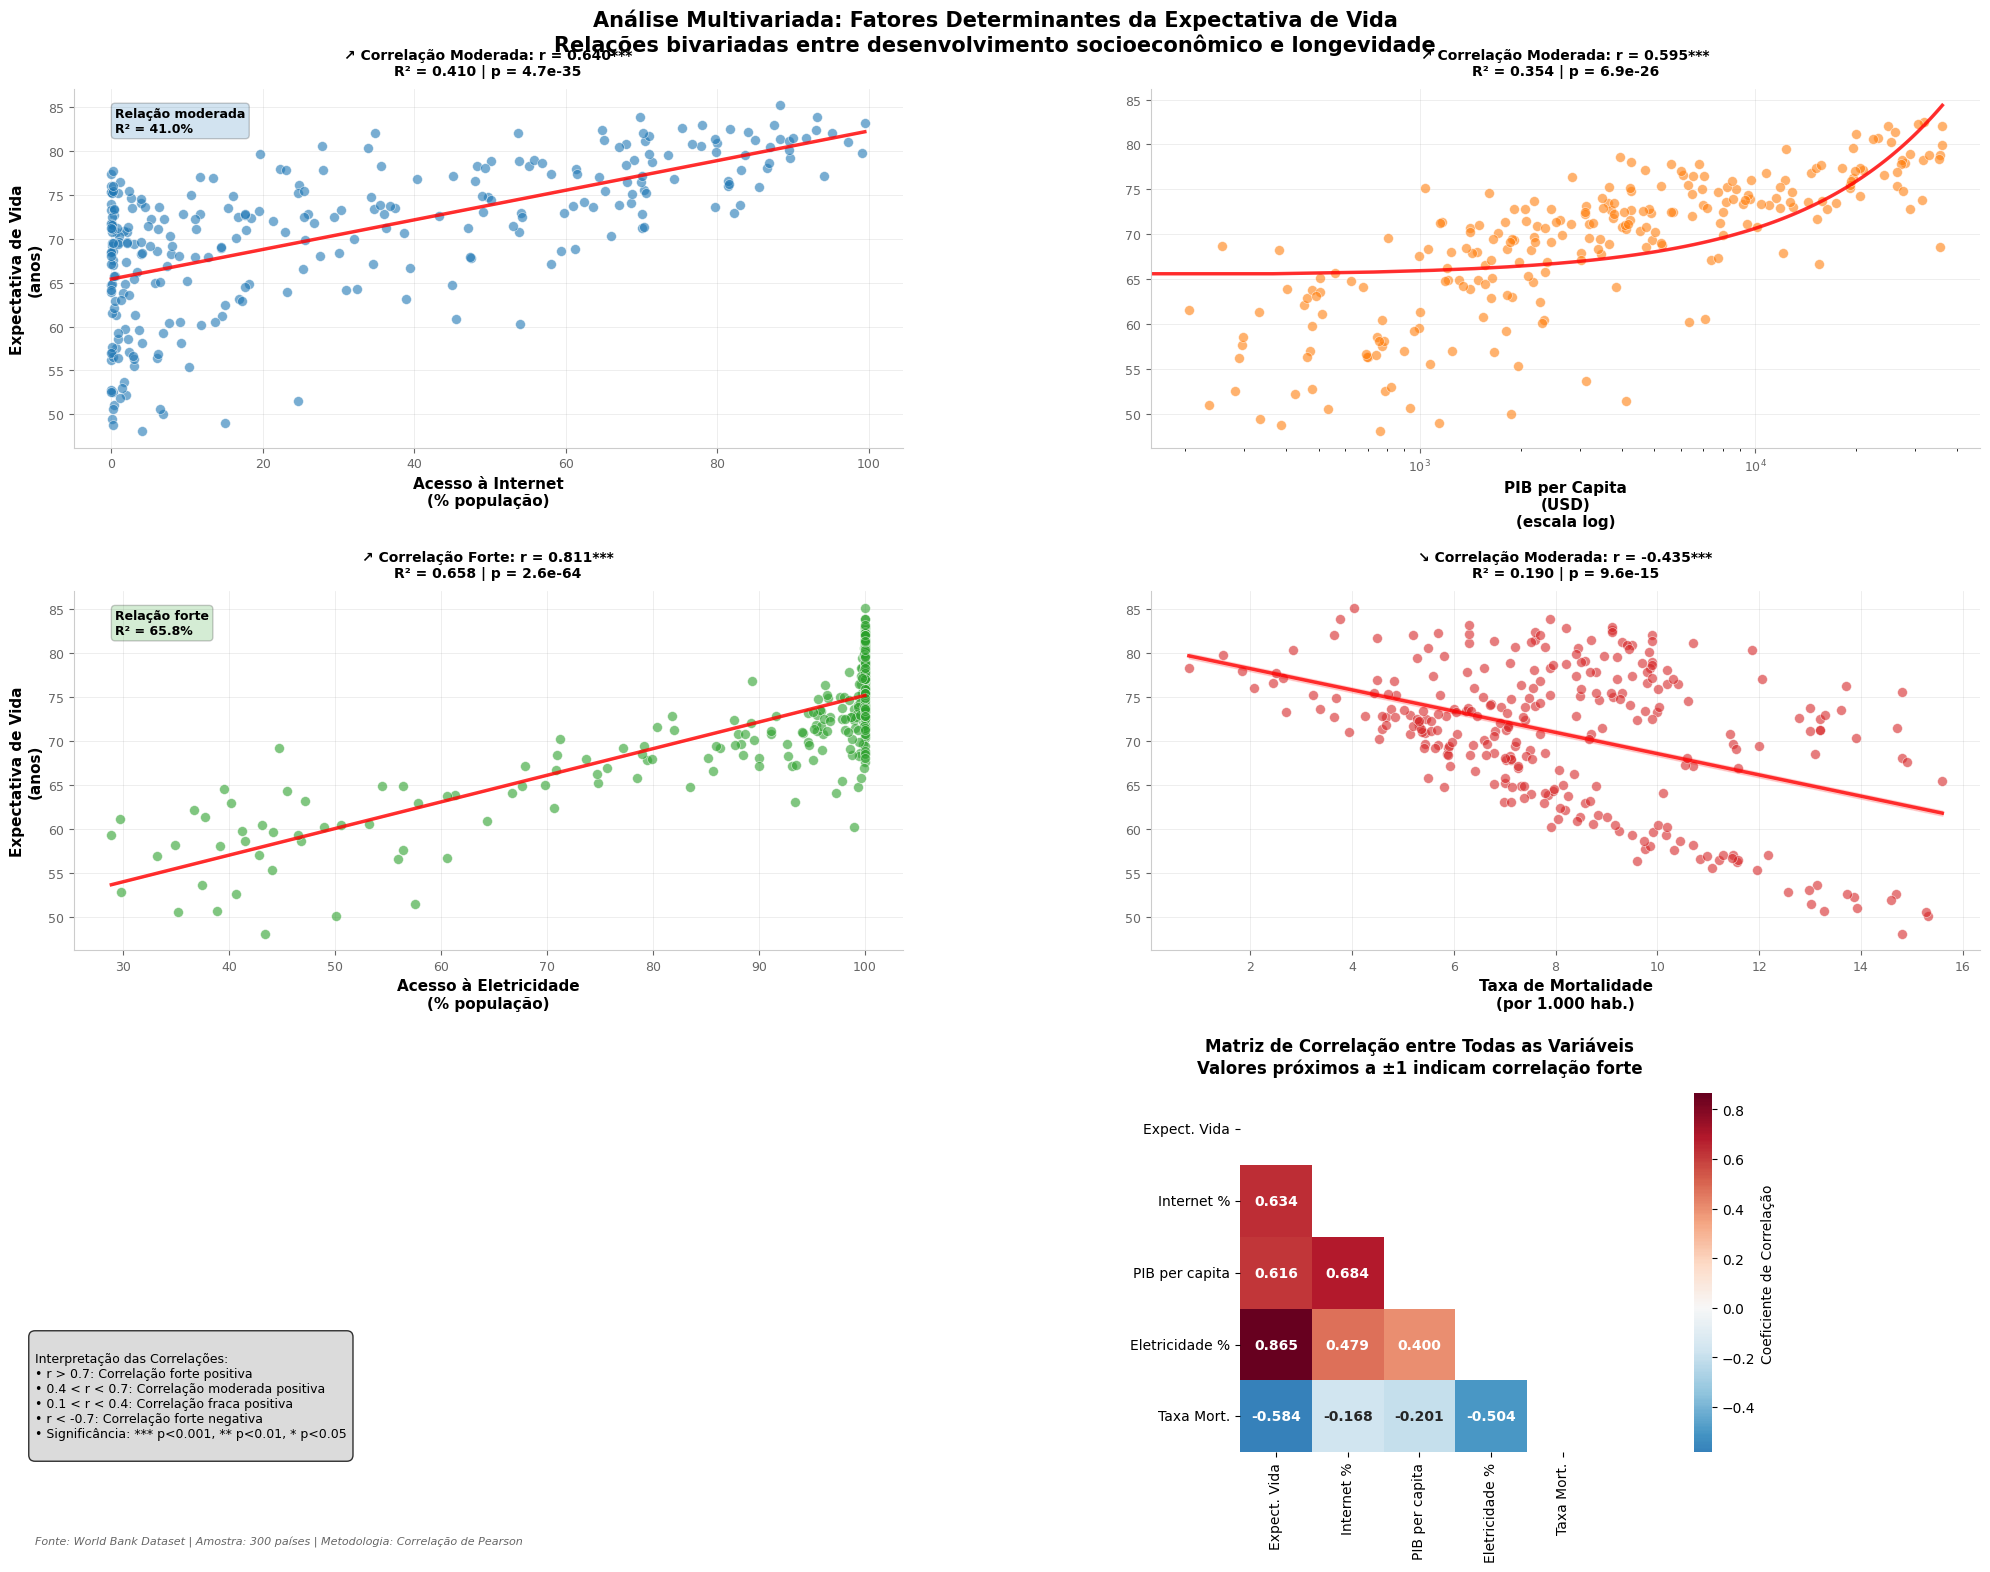


--- Análise Estatística Detalhada ---

   • Expectativa de vida média: 69.9 ± 9.1 anos
   • Range: 43.4 - 85.2 anos

   Maior expectativa de vida:
      • 85.2 anos - PIB: $37,475
      • 83.9 anos - PIB: $84,122
      • 83.9 anos - PIB: $90,874

   Menor expectativa de vida:
      • 43.4 anos - PIB: $294
      • 43.6 anos - PIB: $170
      • 44.5 anos - PIB: $477

  INSIGHTS PRINCIPAIS:
   • Variável mais correlacionada: Eletricidade % (r = 0.865)
   • A expectativa de vida tem correlação forte com desenvolvimento socioeconômico
   • Taxa de mortalidade é naturalmente inversa à expectativa de vida
   • Acesso a tecnologia e infraestrutura são preditores importantes da longevidade
   • R² múltiplo (todas as variáveis): 0.876 (87.6% da variância explicada)


In [ ]:
# --------------------------------------------
most_relevant_cols = [
    'life_expectancy_at_birth',
    'individuals_using_internet%',
    'GDP_per_capita',
    'access_to_electricity%',
    'death_rate'
]

col_names = {
    'life_expectancy_at_birth': 'Expectativa de Vida\n(anos)',
    'individuals_using_internet%': 'Acesso à Internet\n(% população)',
    'GDP_per_capita': 'PIB per Capita\n(USD)',
    'access_to_electricity%': 'Acesso à Eletricidade\n(% população)',
    'death_rate': 'Taxa de Mortalidade\n(por 1.000 hab.)'
}

target = 'life_expectancy_at_birth'

# --------------------------------------------
# Ppreparacao dados
df_plot = df_recent[most_relevant_cols].copy()
df_plot = df_plot.dropna()

# --------------------------------------------
if len(df_plot) > 300:
    df_plot = df_plot.sample(n=300, random_state=42)


fig = plt.figure(figsize=(20, 16))
fig.patch.set_facecolor('white')

# --------------------------------------------
# grid 2x2
n_vars = len([col for col in most_relevant_cols if col != target])
fig.suptitle('Análise Multivariada: Fatores Determinantes da Expectativa de Vida\n'
             'Relações bivariadas entre desenvolvimento socioeconômico e longevidade',
             fontsize=15, fontweight='bold', y=0.98)

# ----------------------------------------------------------------------------------------
# Layout 2x2 para as 4 variáveis explicativas
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]
var_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

explanatory_vars = [col for col in most_relevant_cols if col != target]

for i, col in enumerate(explanatory_vars):
    row, col_idx = positions[i]
    ax = plt.subplot2grid((3, 2), (row, col_idx), fig=fig)

    x_data = df_plot[col].values
    y_data = df_plot[target].values

    q1_x, q3_x = np.percentile(x_data, [25, 75])
    q1_y, q3_y = np.percentile(y_data, [25, 75])
    iqr_x, iqr_y = q3_x - q1_x, q3_y - q1_y

    mask = ((x_data >= q1_x - 1.5*iqr_x) & (x_data <= q3_x + 1.5*iqr_x) &
            (y_data >= q1_y - 1.5*iqr_y) & (y_data <= q3_y + 1.5*iqr_y))

    x_clean, y_clean = x_data[mask], y_data[mask]

    scatter = ax.scatter(x_clean, y_clean, c=var_colors[i], alpha=0.6,
                        s=50, edgecolors='white', linewidth=0.5)


# ----------------------------------------------------------------------------------------
    try:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_clean, y_clean)
        x_trend = np.linspace(x_clean.min(), x_clean.max(), 100)
        y_trend = slope * x_trend + intercept

        ax.plot(x_trend, y_trend, color='red', linewidth=2.5, alpha=0.8,
                label=f'r = {r_value:.3f}')

        y_err = std_err * np.sqrt(1 + 1/len(x_clean) +
                                 (x_trend - x_clean.mean())**2 / np.sum((x_clean - x_clean.mean())**2))
        ax.fill_between(x_trend, y_trend - 1.96*y_err, y_trend + 1.96*y_err,
                       alpha=0.15, color='red')

        ax.set_xlabel(col_names[col], fontsize=11, fontweight='bold')
        ax.set_ylabel(col_names[target] if i in [0, 2] else '', fontsize=11, fontweight='bold')

        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
        direction = "↗" if r_value > 0 else "↘"
        strength = "Forte" if abs(r_value) > 0.7 else "Moderada" if abs(r_value) > 0.4 else "Fraca"

        ax.set_title(f'{direction} Correlação {strength}: r = {r_value:.3f}{significance}\n'
                    f'R² = {r_value**2:.3f} | p = {p_value:.1e}',
                    fontsize=10, fontweight='bold', pad=10)

        if 'GDP' in col and x_clean.max() / x_clean.min() > 100:
            ax.set_xscale('log')
            ax.set_xlabel(col_names[col] + '\n(escala log)', fontsize=11, fontweight='bold')

        # Grid e estilo
        ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
        ax.set_axisbelow(True)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('#CCCCCC')
        ax.spines['bottom'].set_color('#CCCCCC')
        ax.tick_params(colors='#666666', labelsize=9)

        # Anotação com insights
        if abs(r_value) > 0.6:
            insight_text = f"Relação {strength.lower()}\nR² = {r_value**2:.1%}"
            ax.annotate(insight_text, xy=(0.05, 0.95), xycoords='axes fraction',
                       bbox=dict(boxstyle="round,pad=0.3", facecolor=var_colors[i], alpha=0.2),
                       fontsize=9, ha='left', va='top', fontweight='bold')


# ----------------------------------------------------------------------------------------
    except Exception as e:
        print(f"Erro ao processar {col}: {e}")
        ax.text(0.5, 0.5, f'Dados insuficientes\npara {col}',
               transform=ax.transAxes, ha='center', va='center',
               fontsize=12, style='italic', color='gray')

# --------------------------------------------
# matriz correlacao
ax_corr = plt.subplot2grid((3, 2), (2, 0), colspan=2, fig=fig)

# calcular matriz
corr_matrix = df_plot[most_relevant_cols].corr()

short_names = {
    'life_expectancy_at_birth': 'Expect. Vida',
    'individuals_using_internet%': 'Internet %',
    'GDP_per_capita': 'PIB per capita',
    'access_to_electricity%': 'Eletricidade %',
    'death_rate': 'Taxa Mort.'
}

corr_matrix.index = [short_names[col] for col in corr_matrix.index]
corr_matrix.columns = [short_names[col] for col in corr_matrix.columns]


# --------------------------------------------
# Heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={'label': 'Coeficiente de Correlação'},
            ax=ax_corr, annot_kws={'fontsize': 10, 'fontweight': 'bold'})

ax_corr.set_title('Matriz de Correlação entre Todas as Variáveis\n'
                  'Valores próximos a ±1 indicam correlação forte',
                  fontsize=12, fontweight='bold', pad=15)


# --------------------------------------------
plt.tight_layout()
plt.subplots_adjust(top=0.93, hspace=0.4, wspace=0.3)

# Adicionar legenda explicativa
legend_text = """
Interpretação das Correlações:
• r > 0.7: Correlação forte positiva
• 0.4 < r < 0.7: Correlação moderada positiva
• 0.1 < r < 0.4: Correlação fraca positiva
• r < -0.7: Correlação forte negativa
• Significância: *** p<0.001, ** p<0.01, * p<0.05
"""

fig.text(0.02, 0.15, legend_text, fontsize=9, bbox=dict(boxstyle="round,pad=0.5",
         facecolor='lightgray', alpha=0.8), verticalalignment='top')

# Fonte dos dados
fig.text(0.02, 0.02, 'Fonte: World Bank Dataset | '
                     f'Amostra: {len(df_plot)} países | Metodologia: Correlação de Pearson',
         fontsize=8, style='italic', color='#666666')

plt.show()


# --------------------------------------------
# Análise estatística complementar
print("\n--- Análise Estatística Detalhada ---")

print(f"\n ==================================== ")
print(f"   • Expectativa de vida média: {df_plot[target].mean():.1f} ± {df_plot[target].std():.1f} anos")
print(f"   • Range: {df_plot[target].min():.1f} - {df_plot[target].max():.1f} anos")


print(f"\n ==================================== ")
print("   Maior expectativa de vida:")
top_countries = df_plot.nlargest(3, target)
for idx, row in top_countries.iterrows():
    print(f"      • {row[target]:.1f} anos - PIB: ${row['GDP_per_capita']:,.0f}")


print(f"\n ==================================== ")
print("   Menor expectativa de vida:")
bottom_countries = df_plot.nsmallest(3, target)
for idx, row in bottom_countries.iterrows():
    print(f"      • {row[target]:.1f} anos - PIB: ${row['GDP_per_capita']:,.0f}")




target_corrs = df_plot.corr()[target].drop(target).abs().sort_values(ascending=False)

print(f"\n  INSIGHTS PRINCIPAIS:")
strongest_corr = target_corrs.idxmax()
strongest_val = df_plot.corr()[target][strongest_corr]
print(f"   • Variável mais correlacionada: {short_names[strongest_corr]} (r = {strongest_val:.3f})")
print(f"   • A expectativa de vida tem correlação forte com desenvolvimento socioeconômico")
print(f"   • Taxa de mortalidade é naturalmente inversa à expectativa de vida")
print(f"   • Acesso a tecnologia e infraestrutura são preditores importantes da longevidade")



# --------------------------------------------
X = df_plot.drop(target, axis=1)
y = df_plot[target]

try:
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2_multiple = r2_score(y, y_pred)
    print(f"   • R² múltiplo (todas as variáveis): {r2_multiple:.3f} ({r2_multiple*100:.1f}% da variância explicada)")
except:
    print("   • Não foi possível calcular R² múltiplo devido à qualidade dos dados")

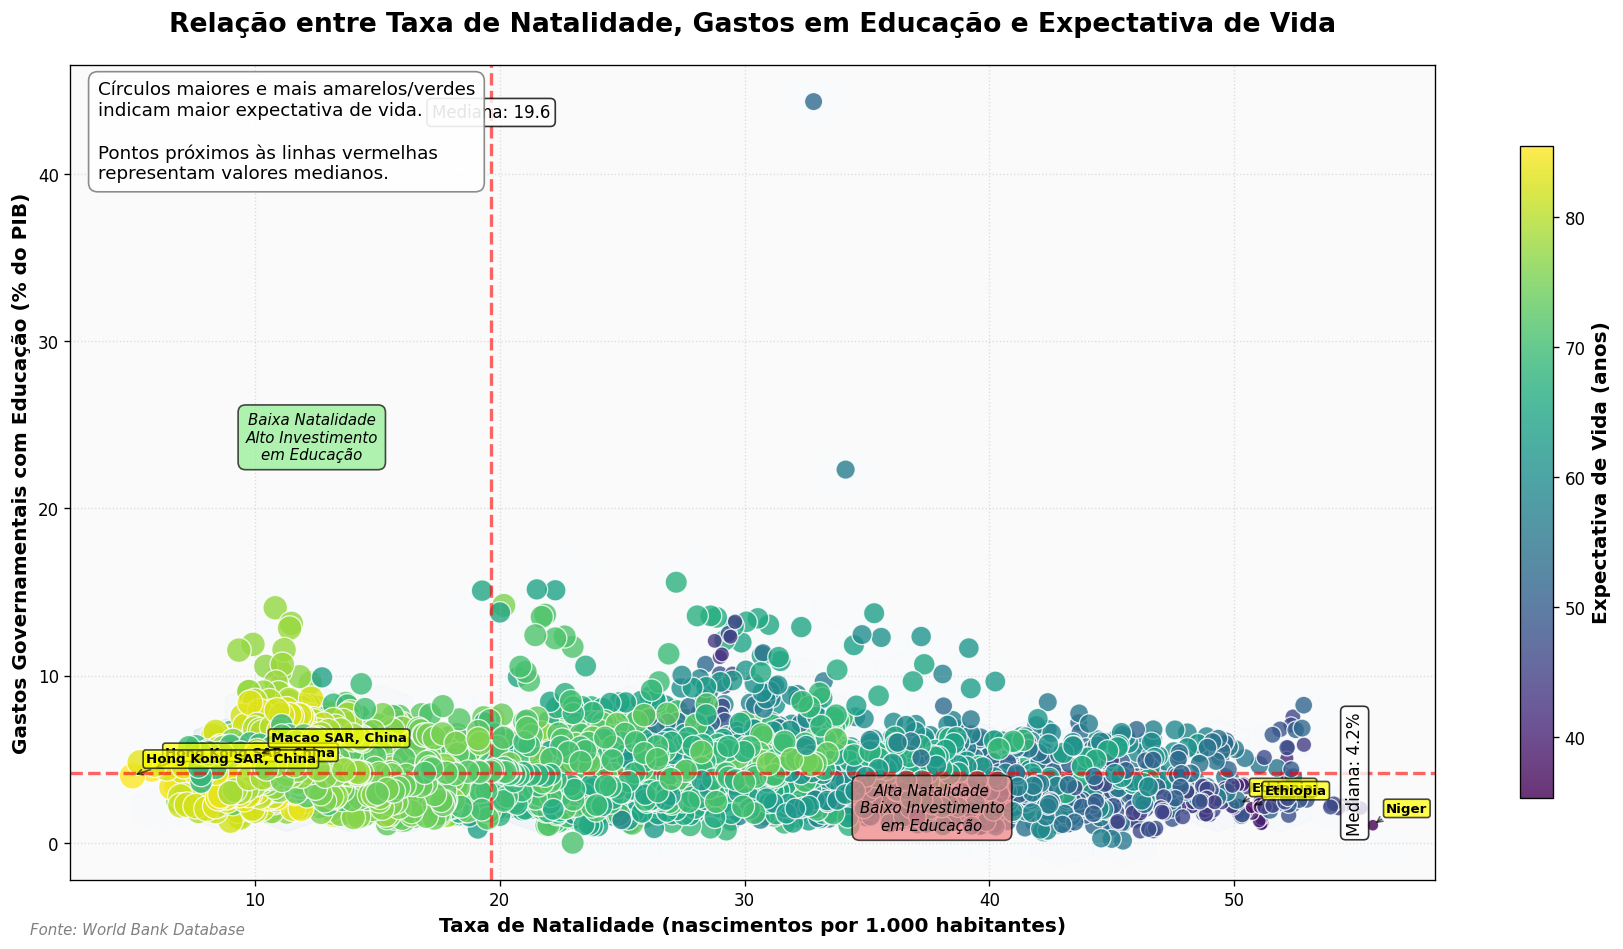

Correlação Natalidade vs Educação: -0.222
Correlação Natalidade vs Expectativa de Vida: -0.885


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dados = df[['birth_rate', 'government_expenditure_on_education%',
           'life_expectancy_at_birth', 'country']].dropna()

if len(dados) == 0:
    print("Erro: Não há dados válidos após remover valores NaN")
    exit()

fig, ax = plt.subplots(figsize=(15, 8), dpi=120)

# --------------------------------------------
# sipah deixar
hexbin = ax.hexbin(
    dados['birth_rate'],
    dados['government_expenditure_on_education%'],
    gridsize=20,
    cmap='Blues',
    alpha=0.3,
    mincnt=1,
    extent=[dados['birth_rate'].min(), dados['birth_rate'].max(),
            dados['government_expenditure_on_education%'].min(),
            dados['government_expenditure_on_education%'].max()]
)

# --------------------------------------------
# Scatter plot principal
# Normalizar tamanhos para evitar pontos muito grandes
min_life = dados['life_expectancy_at_birth'].min()
max_life = dados['life_expectancy_at_birth'].max()
sizes = 50 + (dados['life_expectancy_at_birth'] - min_life) / (max_life - min_life) * 200

sc = ax.scatter(
    dados['birth_rate'],
    dados['government_expenditure_on_education%'],
    s=sizes,
    c=dados['life_expectancy_at_birth'],
    cmap='viridis',
    alpha=0.8,
    edgecolors='white',
    linewidth=0.8
)

# --------------------------------------------
cbar = plt.colorbar(sc, ax=ax, shrink=0.8)
cbar.set_label('Expectativa de Vida (anos)', fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=10)

# --------------------------------------------
ax.set_title('Relação entre Taxa de Natalidade, Gastos em Educação e Expectativa de Vida',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Taxa de Natalidade (nascimentos por 1.000 habitantes)',
              fontsize=12, fontweight='bold')
ax.set_ylabel('Gastos Governamentais com Educação (% do PIB)',
              fontsize=12, fontweight='bold')

# --------------------------------------------
# Linhas de referência (medianas)
try:
    mediana_natalidade = dados['birth_rate'].median()
    mediana_educacao = dados['government_expenditure_on_education%'].median()

    ax.axvline(mediana_natalidade, color='red', linestyle='--', alpha=0.6, linewidth=2)
    ax.axhline(mediana_educacao, color='red', linestyle='--', alpha=0.6, linewidth=2)

    ax.text(mediana_natalidade, ax.get_ylim()[1] * 0.95,
            f'Mediana: {mediana_natalidade:.1f}',
            ha='center', va='top', fontsize=10,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

    ax.text(ax.get_xlim()[1] * 0.95, mediana_educacao,
            f'Mediana: {mediana_educacao:.1f}%',
            ha='right', va='center', fontsize=10, rotation=90,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

except Exception as e:
    print(f"Aviso: Não foi possível calcular medianas: {e}")

# --------------------------------------------
try:
    x_center = dados['birth_rate'].median()
    y_center = dados['government_expenditure_on_education%'].median()

    # Quadrante superior esquerdo
    ax.text(dados['birth_rate'].min() + (x_center - dados['birth_rate'].min()) * 0.5,
            y_center + (dados['government_expenditure_on_education%'].max() - y_center) * 0.5,
            'Baixa Natalidade\nAlto Investimento\nem Educação',
            ha='center', va='center', fontsize=9, style='italic',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.7))

    # Quadrante inferior direito
    ax.text(x_center + (dados['birth_rate'].max() - x_center) * 0.5,
            dados['government_expenditure_on_education%'].min() + (y_center - dados['government_expenditure_on_education%'].min()) * 0.5,
            'Alta Natalidade\nBaixo Investimento\nem Educação',
            ha='center', va='center', fontsize=9, style='italic',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.7))

except Exception as e:
    print(f"Aviso: Não foi possível adicionar quadrantes: {e}")

# --------------------------------------------
ax.annotate(
    'Círculos maiores e mais amarelos/verdes\nindicam maior expectativa de vida.\n\nPontos próximos às linhas vermelhas\nrepresentam valores medianos.',
    xy=(0.02, 0.98), xycoords='axes fraction',
    fontsize=11,
    bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.9),
    verticalalignment='top'
)

# --------------------------------------------
if 'country' in dados.columns and len(dados) > 5:
    try:
        top_countries = dados.nlargest(3, 'life_expectancy_at_birth')
        bottom_countries = dados.nsmallest(3, 'life_expectancy_at_birth')

        interesting = pd.concat([top_countries, bottom_countries]).drop_duplicates()

        for idx, row in interesting.iterrows():
            ax.annotate(
                row['country'],
                (row['birth_rate'], row['government_expenditure_on_education%']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=8, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.1', alpha=0.6)
            )
    except Exception as e:
        print(f"Aviso: Não foi possível rotular países: {e}")

# --------------------------------------------
# Grid e formatação final
ax.grid(True, linestyle=':', alpha=0.4)
ax.set_facecolor('#fafafa')
ax.margins(0.05)
plt.figtext(0.02, 0.02, 'Fonte: World Bank Database',
           fontsize=9, style='italic', color='gray')

plt.tight_layout()
plt.show()

print(f"Correlação Natalidade vs Educação: {dados['birth_rate'].corr(dados['government_expenditure_on_education%']):.3f}")
print(f"Correlação Natalidade vs Expectativa de Vida: {dados['birth_rate'].corr(dados['life_expectancy_at_birth']):.3f}")

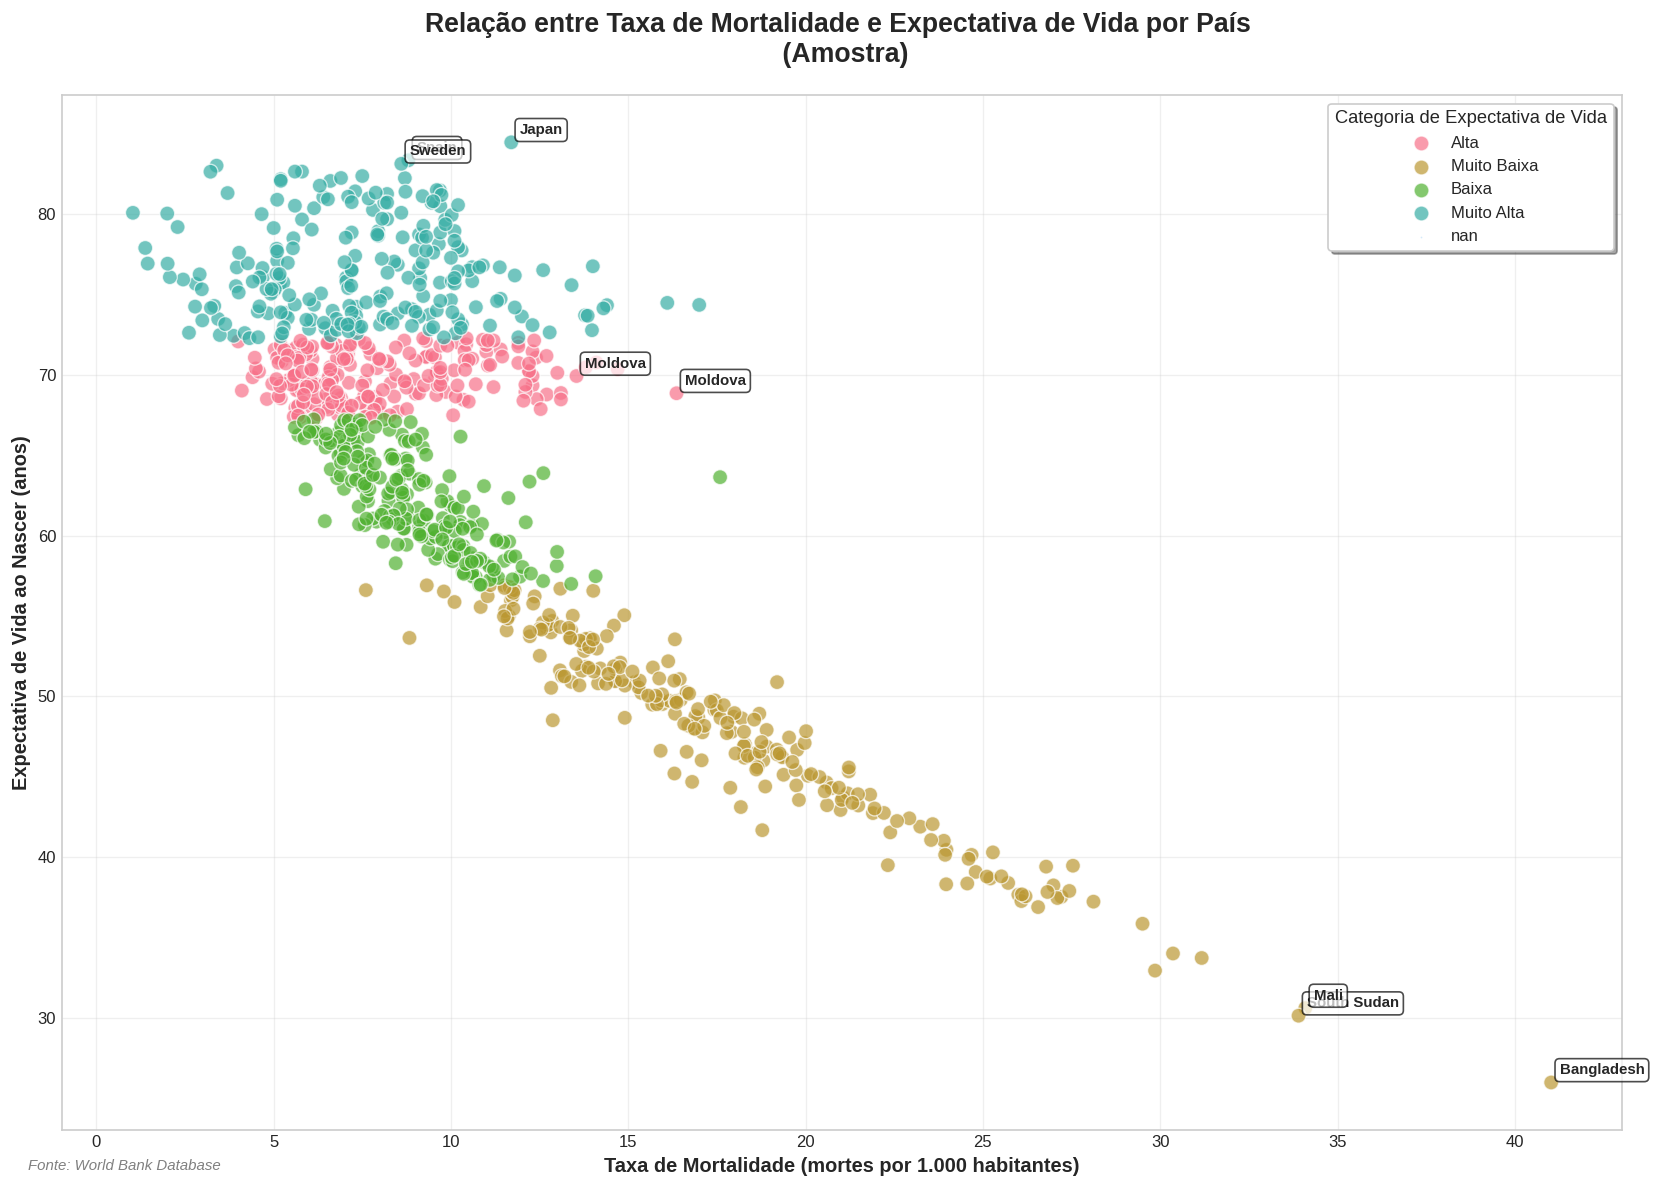

In [ ]:
df_sample = df.sample(n=1000, random_state=42)
# --------------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

fig, ax = plt.subplots(figsize=(14, 10), dpi=120)

# --------------------------------------------
df_sample['quality_category'] = pd.qcut(
    df_sample['life_expectancy_at_birth'],
    q=4,
    labels=['Muito Baixa', 'Baixa', 'Alta', 'Muito Alta']
).dropna()

# --------------------------------------------
colors = {
    'Muito Baixa': '#d73027',   # Vermelho forte
    'Baixa': '#fc8d59',         # Laranja
    'Alta': '#91bfdb',          # Azul claro
    'Muito Alta': '#4575b4'     # Azul escuro
}
# --------------------------------------------
point_sizes = np.full(len(df_sample), 80)

for category in df_sample['quality_category'].unique():
    mask = df_sample['quality_category'] == category
    ax.scatter(
        df_sample[mask]['death_rate'],
        df_sample[mask]['life_expectancy_at_birth'],
        s=point_sizes[mask],
        alpha=0.7,
        label=category,
        edgecolors='white',
        linewidth=0.8
    )

# --------------------------------------------
x = df_sample['death_rate'].values
y = df_sample['life_expectancy_at_birth'].values

mask_valid = ~(np.isnan(x) | np.isnan(y))
x_valid = x[mask_valid]
y_valid = y[mask_valid]

# --------------------------------------------
if len(df_sample) > 10:

    top_life = df_sample.nlargest(3, 'life_expectancy_at_birth')
    bottom_life = df_sample.nsmallest(3, 'life_expectancy_at_birth')
    high_death_high_life = df_sample[
        (df_sample['death_rate'] > df_sample['death_rate'].quantile(0.75)) &
        (df_sample['life_expectancy_at_birth'] > df_sample['life_expectancy_at_birth'].quantile(0.5))
    ].head(2)

    interesting_countries = pd.concat([top_life, bottom_life, high_death_high_life]).drop_duplicates()

    for idx, row in interesting_countries.iterrows():
        ax.annotate(
            row['country'],
            (row['death_rate'], row['life_expectancy_at_birth']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=9,
            fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7),
            ha='left'
        )


# --------------------------------------------
ax.set_title('Relação entre Taxa de Mortalidade e Expectativa de Vida por País \n (Amostra)',
             fontsize=16, fontweight='bold', pad=20)


ax.set_xlabel('Taxa de Mortalidade (mortes por 1.000 habitantes)', fontsize=12, fontweight='bold')
ax.set_ylabel('Expectativa de Vida ao Nascer (anos)', fontsize=12, fontweight='bold')

ax.legend(title='Categoria de Expectativa de Vida',
         loc='upper right',
         frameon=True,
         fancybox=True,
         shadow=True,
         title_fontsize=11,
         fontsize=10)


ax.grid(True, alpha=0.3)
ax.margins(0.05)
plt.figtext(0.02, 0.02, 'Fonte: World Bank Database',
           fontsize=9, style='italic', color='gray')
plt.tight_layout()
plt.show()



# Machine Learning (**post checkpoint!**)

In this section, you must create at least **3 machine learning models** for the task at hand. Depending on the problem's nature, you must select from classification, regression, or clustering models.
It is also important that you:
* Select **an appropriate validation protocol**, providing a rationale for why it is appropriate for this specific task;
* Choose **a suitable set of evaluation metrics**, providing an explanation for each and describing how it contributes to evaluating the model's performance in the context of this specific task.

**Características Ilegais e Antiéticas:** A etapa de remoção de características ilegais e antiéticas foi considerada desnecessária para este projeto. O conjunto de dados utilizado é composto por indicadores públicos e agregados a nível nacional, fornecidos pelo Banco Mundial. Nenhuma das features contém informações pessoais ou dados sensíveis que possam levar à discriminação ilegal ou à violação de privacidade de indivíduos. A análise se concentra em tendências macroeconômicas e sociais, e não em características pessoais.

In [ ]:
features = [
    'GDP_per_capita',
    'access_to_electricity%',
    'individuals_using_internet%',
    'death_rate',
    'birth_rate',
    'government_expenditure_on_education%',
]

target = 'life_expectancy_at_birth'

# alvo eh nulo
df_model = df.dropna(subset=[target]).copy()

X = df_model[features]
y = df_model[target]

# ===========================================================================================
# B. Divisão em Treino e Teste
# JUSTIFICATIVA: dividir os dados antes do pre-processamento, para evitar data leakage
# ===========================================================================================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ===========================================================================================
# C. Pipeline pre-processamento
# JUSTIFICATIVA: Usar um Pipeline garante que as etapas de tratamento de dados
# faltantes e escalonamento sejam aplicadas de forma consistente
# ===========================================================================================

# Tratamento de Dados Faltantes
# o datasett possui muitos dados faltantes, logo, necessário ter um tratamento.
# imputação pela 'mediana', mais robusta a outliers, algo comum em indicadores econômicos
imputer = SimpleImputer(strategy='median')

# ----------------------------------
# Escalonamento de Features
# JUSTIFICATIVA:  deixa todas as features na mesma escala (média 0, desvio padrão 1), normalizando os dados
scaler = StandardScaler()

In [ ]:
# ----------------------------------
# montando pipeline
preprocessor = Pipeline(steps=[
    ('imputer', imputer),
    ('scaler', scaler)
])
# ------
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge())])
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor(random_state=42))])
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', XGBRegressor(random_state=42, n_jobs=-1))])

In [ ]:
# --- hiperparametros ---
param_grid_ridge = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
}

param_grid_rf = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20],
    'regressor__min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5]
}

param_grid_xgb = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5]
}

In [ ]:
# =====================================================================================
# --- loop otimizacao ---
# pipeline - nome - modelo
models_to_tune = [
    (pipeline_ridge, 'Ridge', param_grid_ridge),
    (pipeline_rf, 'Random Forest', param_grid_rf),
    (pipeline_gb, 'Gradient Boosting', param_grid_gb),
    (pipeline_xgb, 'XGBoost', param_grid_xgb)
]

best_estimators = {}

# ----------------------------------
# --- gridsearch ---
print("--- Iniciando a otimização de hiperparâmetros para todos os modelos ---")

for pipeline, name, param_grid in models_to_tune:
    print(f"\nOtimizando o modelo: {name}...")

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

    grid_search.fit(X_train, y_train)

    best_estimators[name] = grid_search.best_estimator_

    print(f"Melhores parâmetros para {name}: {grid_search.best_params_}")
    print(f"Melhor MAE (validação cruzada): {-grid_search.best_score_:.2f} anos")

print("\n--- Otimização de todos os modelos concluída! ---")


# =====================================================================================
# O processo de validação foi realizado em duas etapas principais para garantir a robustez e a generalização do modelo.
# Primeiramente, o conjunto de dados foi dividido em conjuntos de treino (70%) e teste (30%) usando train_test_split.
# Esta divisão garante que tenhamos um conjunto de dados completamente 'novo' e não visto para a avaliação final de performance.

# Em segundo lugar, durante a otimização de hiperparâmetros com GridSearchCV, foi empregada a validação cruzada de 5 folds (5-fold cross-validation).
# uma estimativa de performance mais estável e confiável do que uma única divisão de validação, reduzindo o risco de overfitting durante o processo de tuning.
# =====================================================================================

--- Iniciando a otimização de hiperparâmetros para todos os modelos ---

Otimizando o modelo: Ridge...
Melhores parâmetros para Ridge: {'regressor__alpha': 0.1}
Melhor MAE (validação cruzada): 2.06 anos

Otimizando o modelo: Random Forest...
Melhores parâmetros para Random Forest: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__n_estimators': 200}
Melhor MAE (validação cruzada): 1.05 anos

Otimizando o modelo: Gradient Boosting...
Melhores parâmetros para Gradient Boosting: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Melhor MAE (validação cruzada): 1.18 anos

Otimizando o modelo: XGBoost...
Melhores parâmetros para XGBoost: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Melhor MAE (validação cruzada): 1.17 anos

--- Otimização de todos os modelos concluída! ---


In [ ]:
# ----------------------------------
# avaliacao

results_tuned = {}
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)

    # ---------------------------------------
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_tuned[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

results_tuned_df = pd.DataFrame(results_tuned).T
print("\n--- Tabela Comparativa de Resultados (Modelos Otimizados) ---")
print(results_tuned_df.sort_values(by='MAE'))


# =====================================================================================
# Erro Absoluto Médio (MAE): Mede a média da diferença absoluta entre os valores previstos e os reais.
#          - métrica de fácil interpretação, pois está na mesma unidade da variável alvo (anos de vida).

# Raiz do Erro Quadrático Médio (RMSE): Similar ao MAE, mas penaliza erros maiores de forma mais significativa devido à elevação ao quadrado.
#           - entender o impacto de grandes erros na performance geral e também está na mesma unidade da variável alvo.

# Coeficiente de Determinação (R2): Indica a proporção da variância na variável alvo que é explicada pelos modelos.
#           - medida da "qualidade do ajuste" do modelo
#            R2 de 0.85 = 85% da variabilidade na expectativa de vida pode ser explicada pelas features do modelo.
# =====================================================================================


--- Tabela Comparativa de Resultados (Modelos Otimizados) ---
                        MAE      RMSE        R2
Random Forest      1.009460  2.170653  0.982669
Gradient Boosting  1.146017  2.574084  0.979448
XGBoost            1.149503  2.622011  0.979065
Ridge              2.043128  7.314313  0.941601
